In [4]:
from array import array
import itertools
import time
import math

import sys
#####For NERSC:####
#sys.path.insert(0,'/usr/common/software/rootpy/')
import root_numpy
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

#import astroML.plotting as aml
#import iminuit
import pandas as pd
import root_pandas as rpd
from root_pandas import read_root
import ROOT
from ROOT import TH1D
from ROOT import SetOwnership
from matplotlib.ticker import NullFormatter
from ROOT import TLatex

from matplotlib import pyplot as plt
%matplotlib inline    

from default_values import *
import default_values
reload(default_values)

from Statistics import *
import Statistics
reload(Statistics)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zT13fnew/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18152603]
 [0.11831406]]
../InputData/zT_Rebin_8_006zT06zT13fnew/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18152603]
 [0.11831406]]


<module 'functions_root_nparray' from 'functions_root_nparray.pyc'>

# Playing with resolution

In [10]:
a = 1.7
b = 11.1
c = 4.8
E = 25
sigmaEoE = math.sqrt( (a)**2  + (b/math.sqrt(E))**2 + (c/E)**2)
print(sigmaEoE)

2.80272438888


In [2]:
N_Bins = 6
bins = np.geomspace(0.06, 0.6, num=N_Bins+1)
for ibin in bins:
    if ibin == bins[0]:
        print"[%1.3f,"%(ibin),
        
    elif ibin == bins[N_Bins]:
        print"%1.3f]"%(ibin),
        
    else:
        print "%1.3f,"%(ibin),
print("")

[0.060, 0.088, 0.129, 0.190, 0.278, 0.409, 0.600] 


## p--Pb Error Function Fit

0.535827209253
0.0386182398675
9.46305649534
11.3188096455

0.133280 0.169190 0.203815 0.236933 0.268355 0.297931 0.325545 0.351121 0.374621 0.396038 0.415403 0.432770 0.448222 0.461860 0.473799 0.484169 0.493103 0.500738 0.507211 0.512655 0.517197 0.520956 0.524041 0.526554 0.528584 0.530211 0.531505 0.532525 0.533323 0.533942 0.534418 0.534782 0.535058 0.535265 0.535420 0.535534 0.535618 0.535679 0.535723 0.535754 


 FCN=0.859434 FROM MIGRAD    STATUS=CONVERGED     215 CALLS         216 TOTAL
                     EDM=2.20419e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.35829e-01   3.86179e-02   1.76040e-05   9.74606e-03
   2  p1           9.46300e+00   2.13492e+00   4.99057e-04  -4.76701e-04
   3  p2           1.13188e+01   4.23558e+00   8.63297e-04  -1.35678e-04
 FCN=0.859434 FROM MIGRAD    STATUS=CONVERGED      38 CA

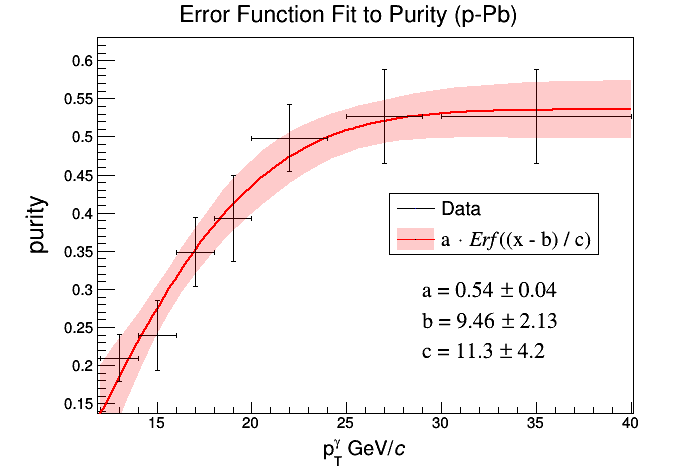

In [3]:
from ROOT import TF1
from ROOT import TMath

pGeV_Edges = np.asarray([12,14,16,18,20,25,30,40,50])
pGeV_Centers = (pGeV_Edges[1:] + pGeV_Edges[:-1]) / 2
pGeV_Widths = [(j-i)/2 for i, j in zip(pGeV_Edges[:-1], pGeV_Edges[1:])]
#print(pGeV_Widths)

Purity = [0.21,0.24,0.349,0.393,0.498,0.527,0.527,0.527] #8
Purity_errors = [0.031,0.046,0.045,0.056,0.044,0.062,0.062,0.062,0.062]

#Fill a TGraph with Purity Information
Purity_Graph = ROOT.TGraphErrors()
for izt in range (len(Purity)):

    Purity_Graph.SetPoint(izt,pGeV_Centers[izt],Purity[izt])
    Purity_Graph.SetPointError(izt,pGeV_Widths[izt],Purity_errors[izt])
    
    #Purity_Graph.SetPointError(izt,0,Purity_errors[izt])
    #Purity_Graph.SetPoint(izt,pGeV_Edges[izt],Purity[izt])

#Define your function and set parameters (notice use of string)
func = TF1("func",'[0]*TMath::Erf((x-[1])/[2])',12,40)
func.SetParameter(0,0.5)
func.SetParameter(1,0.5)
func.SetParameter(2,1.0)

Purity_Graph.Fit("func","S")

Fit_Band = ROOT.TGraphErrors(len(Purity));
pGeV_Edges_3 = np.linspace(12,40,40)
for i in range(len(pGeV_Edges_3)):
        Fit_Band.SetPoint(i, pGeV_Edges_3[i], 0)
(ROOT.TVirtualFitter.GetFitter()).GetConfidenceIntervals(Fit_Band,0.68)
    
c = ROOT.TCanvas()
c.SetRightMargin(0.09);
c.SetLeftMargin(0.14);
c.SetBottomMargin(0.125);
c.SetTopMargin(0.08)

Purity_Graph.SetTitle("Error Function Fit to Purity (p-Pb)")
#Purity_Graph.SetMarkerStyle(8)
Purity_Graph.SetMarkerSize(0.5)
Purity_Graph.SetMarkerColorAlpha(4,1.0)
Purity_Graph.Draw("AP")

x = Purity_Graph.GetXaxis()
x.SetRangeUser(12.0,40.0)
x.SetTitle("p_{T}^{#gamma} GeV/#it{c}")
x.SetTitleSize(0.045)
x.SetTitleOffset(1.15)
x.CenterTitle()

y = Purity_Graph.GetYaxis()
y.SetTitleSize(0.055)
y.SetTitle("purity")
y.SetTitleOffset(1.0)
y.CenterTitle()

fit = Purity_Graph.Fit("func","S")
print(fit)
print fit.Parameters()[0]
print fit.ParError(0)
print fit.Parameters()[1]
print fit.Parameters()[2]

latex = ROOT.TLatex();
latex.SetTextSize(0.05);
latex.SetTextAlign(13);  #align at top
#latex.DrawLatex(25,.35,"#font[12]{a #times Erf((x - b) / c)}")
latex.DrawLatex(29,.31,"#font[132]{a = %1.2f #pm %1.2f}"%(fit.Parameters()[0],fit.ParError(0)))
latex.DrawLatex(29,.27,"#font[132]{b = %1.2f #pm %1.2f}"%(fit.Parameters()[1],fit.ParError(1)))
latex.DrawLatex(29,.23,"#font[132]{c = %1.1f #pm %1.1f}"%(fit.Parameters()[2],fit.ParError(2)))

legend = ROOT.TLegend(0.56,0.46,0.86,0.59)
#legend = ROOT.TLegend(0.18,0.88,0.4,0.75)
legend.AddEntry(Purity_Graph,"Data")
legend.AddEntry(Fit_Band,"#scale[1.1]{#font[132]{a #upoint #it{Erf}((x - b) / c)}}")
legend.Draw()

Fit_Band.SetLineColor(ROOT.kRed);
Fit_Band.SetFillColorAlpha(ROOT.kRed,0.2)
Fit_Band.Draw("same3");
c.Draw()

#c.SaveAs("pics/LO/%s/p-Pb_Err_Function_Purity.pdf"%(description_string))

print("")
fit_vals = []
for x in pGeV_Edges_3:
    Err_val = fit.Parameters()[0]*TMath.Erf((x-fit.Parameters()[1])/fit.Parameters()[2])
    fit_vals.append(Err_val)
    print("%1.6f"%(Err_val)),
print("\n")
print("")

## pp Error Function Fit

[1.5, 2.5, 2.5, 7.5, 7.5]
[0.05502727 0.04104875 0.07155418 0.08947067 0.08947067]
0.49393076244
0.0607695711437
9.8267810911
10.5842593653

0.112848 0.148539 0.182931 0.215771 0.246839 0.275964 0.303017 0.327914 0.350619 0.371134 0.389502 0.405796 0.420118 0.432592 0.443357 0.452562 0.460360 0.466907 0.472353 0.476841 0.480506 0.483472 0.485850 0.487740 0.489227 0.490387 0.491283 0.491969 0.492490 0.492882 0.493173 0.493388 0.493546 0.493660 0.493742 0.493800 0.493841 0.493870 0.493890 0.493903 


 FCN=0.180521 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=2.21634e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.93932e-01   6.07691e-02   2.47913e-05   3.41131e-03
   2  p1           9.82674e+00   3.93740e+00   7.87757e-04  -9.20864e-05
   3  p2           1.05842e+01   7.72077e+00   1

Info in <TCanvas::Print>: pdf file pics/LO/zT_Rebin_8_006zT06zT13fnew/pp_Err_Function_Purity.pdf has been created


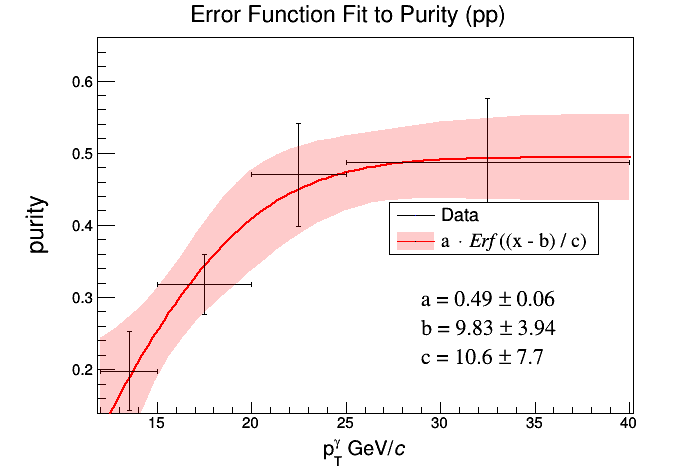

In [4]:
from ROOT import TF1
from ROOT import TMath

pGeV_Edges = np.asarray([12.,15.,20.,25.,40.,55.])
pGeV_Centers = (pGeV_Edges[1:] + pGeV_Edges[:-1]) / 2
pGeV_Widths = [(j-i)/2 for i, j in zip(pGeV_Edges[:-1], pGeV_Edges[1:])]
print(pGeV_Widths)

Purity = [0.198,0.318,0.470,0.487,0.487]
    
Purity_stat_error = np.asarray([0.018,0.023,0.032,0.038,0.038])
Purity_sys_error = np.asarray([0.052,0.034,0.064,0.081,0.081])

Purity_errors = np.sqrt(Purity_stat_error**2 + Purity_sys_error**2)

print((Purity_errors))

#Fill a TGraph with Purity Information
Purity_Graph = ROOT.TGraphErrors()
for izt in range (len(Purity)):

    Purity_Graph.SetPoint(izt,pGeV_Centers[izt],Purity[izt])
    Purity_Graph.SetPointError(izt,pGeV_Widths[izt],Purity_errors[izt])
    
    #Purity_Graph.SetPointError(izt,0,Purity_errors[izt])
    #Purity_Graph.SetPoint(izt,pGeV_Edges[izt],Purity[izt])

#Define your function and set parameters (notice use of string)
func = TF1("func",'[0]*TMath::Erf((x-[1])/[2])',12,40)
#func = TF1("func",'pol5',12,40)
func.SetParameter(0,0.55)
func.SetParameter(1,8.0)
func.SetParameter(2,12.0)

Purity_Graph.Fit("func","S")

Fit_Band = ROOT.TGraphErrors(len(Purity));
pGeV_Edges_3 = np.linspace(12,40,40)
for i in range(len(pGeV_Edges_3)):
        Fit_Band.SetPoint(i, pGeV_Edges_3[i], 0)
(ROOT.TVirtualFitter.GetFitter()).GetConfidenceIntervals(Fit_Band,0.68)
    
c = ROOT.TCanvas()
c.SetRightMargin(0.09);
c.SetLeftMargin(0.14);
c.SetBottomMargin(0.125);
c.SetTopMargin(0.08)

Purity_Graph.SetTitle("Error Function Fit to Purity (pp)")
#Purity_Graph.SetMarkerStyle(8)
Purity_Graph.SetMarkerSize(0.5)
Purity_Graph.SetMarkerColorAlpha(4,1.0)
Purity_Graph.Draw("AP")

x = Purity_Graph.GetXaxis()
x.SetRangeUser(12.0,40.0)
x.SetTitle("p_{T}^{#gamma} GeV/#it{c}")
x.SetTitleSize(0.045)
x.SetTitleOffset(1.15)
x.CenterTitle()

y = Purity_Graph.GetYaxis()
y.SetTitleSize(0.055)
y.SetTitle("purity")
y.SetTitleOffset(1.0)
y.CenterTitle()
y.SetRangeUser(0.14,0.66)

fit = Purity_Graph.Fit("func","S")
print(fit)
print fit.Parameters()[0]
print fit.ParError(0)
print fit.Parameters()[1]
print fit.Parameters()[2]

latex = ROOT.TLatex();
latex.SetTextSize(0.05);
latex.SetTextAlign(13);  #align at top
#latex.DrawLatex(25,.35,"#font[12]{a #times Erf((x - b) / c)}")
latex.DrawLatex(29,.31,"#font[132]{a = %1.2f #pm %1.2f}"%(fit.Parameters()[0],fit.ParError(0)))
latex.DrawLatex(29,.27,"#font[132]{b = %1.2f #pm %1.2f}"%(fit.Parameters()[1],fit.ParError(1)))
latex.DrawLatex(29,.23,"#font[132]{c = %1.1f #pm %1.1f}"%(fit.Parameters()[2],fit.ParError(2)))

legend = ROOT.TLegend(0.56,0.46,0.86,0.57)
#legend = ROOT.TLegend(0.18,0.88,0.4,0.75)
legend.AddEntry(Purity_Graph,"Data")
legend.AddEntry(Fit_Band,"#scale[1.1]{#font[132]{a #upoint #it{Erf}((x - b) / c)}}")
legend.Draw()

Fit_Band.SetLineColor(ROOT.kRed);
Fit_Band.SetFillColorAlpha(ROOT.kRed,0.2)
Fit_Band.Draw("same3");
c.Draw()
c.SaveAs("pics/LO/%s/pp_Err_Function_Purity.pdf"%(description_string))

print("")
fit_vals = []
for x in pGeV_Edges_3:
    Err_val = fit.Parameters()[0]*TMath.Erf((x-fit.Parameters()[1])/fit.Parameters()[2])
    fit_vals.append(Err_val)
    print("%1.6f"%(Err_val)),
print("\n")
print("")

# MEAN pT AS BIN CENTER

ASSYMETRIC STUFF
[1.1986559999999997, 1.9035709999999995, 2.064577, 5.107410999999999, 5.0]
[1.8013440000000003, 3.0964290000000005, 2.935423, 9.892589000000001, 10.0]
[0.05502727 0.04104875 0.07155418 0.08947067 0.08947067]
0.493663167953
9.65539050112
10.113534771

0.126861 0.163664 0.198920 0.232355 0.263745 0.292921 0.319766 0.344220 0.366272 0.385958 0.403358 0.418581 0.431768 0.443075 0.452674 0.460741 0.467452 0.472980 0.477488 0.481126 0.484034 0.486334 0.488136 0.489533 0.490605 0.491420 0.492033 0.492489 0.492826 0.493072 0.493249 0.493376 0.493466 0.493529 0.493573 0.493603 0.493623 0.493637 0.493646 0.493652 


 FCN=0.128416 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=1.05925e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.93664e-01   6.20264e-02   2.43245e-05   1.0701

Info in <TCanvas::Print>: pdf file pics/LO/zT_Rebin_8_006zT06zT13fnew/pp_Err_Function_Purity.pdf has been created


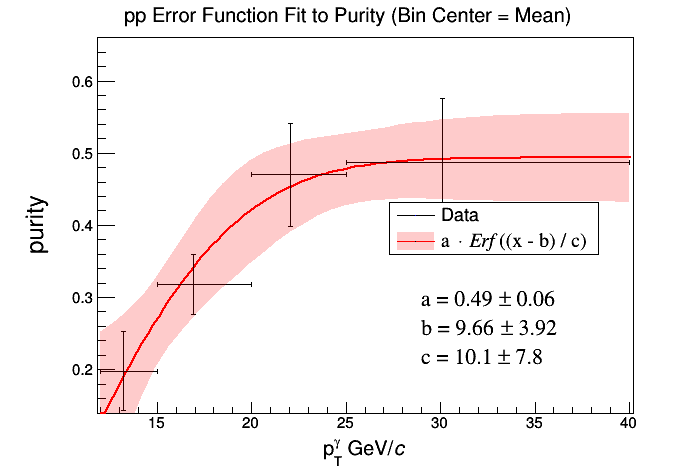

In [5]:
from ROOT import TF1
from ROOT import TMath

#   Double_t x[n]   = {-0.22, 0.05, 0.25, 0.35, 0.5, 0.61,0.7,0.85,0.89,0.95};
#   Double_t y[n]   = {1,2.9,5.6,7.4,9,9.6,8.7,6.3,4.5,1};
#   Double_t exl[n] = {.05,.1,.07,.07,.04,.05,.06,.07,.08,.05}; #left
#   Double_t eyl[n] = {.8,.7,.6,.5,.4,.4,.5,.6,.7,.8};
#   Double_t exh[n] = {.02,.08,.05,.05,.03,.03,.04,.05,.06,.03}; #Right Side
#   Double_t eyh[n] = {.6,.5,.4,.3,.2,.2,.3,.4,.5,.6};
#   auto gr = new TGraphAsymmErrors(n,x,y,exl,exh,eyl,eyh);
#dataGraph = 
#TGraphAsymmErrors(len(x_val), np.array(x_val), np.array(y_val), np.array(x_errL), 
#                  np.array(x_errU), np.array(y_errL), np.array(y_errU))


pGeV_Edges = np.asarray([12,15,20,25,40,55])
pGeV_Centers = np.asarray([13.198656,16.903571,22.064577,30.107411,45])
#pGeV_Centers = (pGeV_Edges[1:] + pGeV_Edges[:-1]) / 2
pGeV_Widths = [(j-i)/2 for i, j in zip(pGeV_Edges[:-1], pGeV_Edges[1:])]
#print(pGeV_Widths)
exl = [i-j for i,j in zip(pGeV_Centers,pGeV_Edges[:-1])]
exh = [i-j for i,j in zip(pGeV_Edges[1:],pGeV_Centers)]
print("ASSYMETRIC STUFF")
print(exl)
print(exh)
Purity = [0.198,0.318,0.470,0.487,0.487]
    
Purity_stat_error = np.asarray([0.018,0.023,0.032,0.038,0.038])
Purity_sys_error = np.asarray([0.052,0.034,0.064,0.081,0.081])

Purity_errors = np.sqrt(Purity_stat_error**2 + Purity_sys_error**2)

print((Purity_errors))

#Fill a TGraph with Purity Information
#Purity_Graph = ROOT.TGraphErrors()
x_val = pGeV_Centers
y_val = Purity
x_errL = exl
x_errU = exh
y_errL = Purity_errors
y_errU = Purity_errors
#Purity_Graph = ROOT.TGraphAsymmErrors(len(pGeV_Centers),pGeV_Centers,np.array(Purity),np.array(exl),np.array(exh),Purity_errors,Purity_errors)
Purity_Graph = ROOT.TGraphAsymmErrors(len(x_val), np.array(x_val), np.array(y_val),
                                      np.array(x_errL),np.array(x_errU), np.array(y_errL), np.array(y_errU))



#for izt in range (len(Purity)):

#    Purity_Graph.SetPoint(izt,pGeV_Centers[izt],Purity[izt])
#    Purity_Graph.SetPointError(izt,pGeV_Widths[izt],Purity_errors[izt])
    
    #Purity_Graph.SetPointError(izt,0,Purity_errors[izt])
    #Purity_Graph.SetPoint(izt,pGeV_Edges[izt],Purity[izt])

#Define your function and set parameters (notice use of string)
func = TF1("func",'[0]*TMath::Erf((x-[1])/[2])',12,40)
func.SetParameter(0,0.55)
func.SetParameter(1,8.0)
func.SetParameter(2,12.0)

Purity_Graph.Fit("func","S")

Fit_Band = ROOT.TGraphErrors(len(Purity));
pGeV_Edges_3 = np.linspace(12,40,40)
for i in range(len(pGeV_Edges_3)):
        Fit_Band.SetPoint(i, pGeV_Edges_3[i], 0)
(ROOT.TVirtualFitter.GetFitter()).GetConfidenceIntervals(Fit_Band,0.68)
    
c = ROOT.TCanvas()
c.SetRightMargin(0.09);
c.SetLeftMargin(0.14);
c.SetBottomMargin(0.125);
c.SetTopMargin(0.08)

Purity_Graph.SetTitle("pp Error Function Fit to Purity (Bin Center = Mean)")
#Purity_Graph.SetMarkerStyle(8)
Purity_Graph.SetMarkerSize(0.5)
Purity_Graph.SetMarkerColorAlpha(4,1.0)
Purity_Graph.Draw("AP")

x = Purity_Graph.GetXaxis()
x.SetRangeUser(12.0,40.0)
x.SetTitle("p_{T}^{#gamma} GeV/#it{c}")
x.SetTitleSize(0.045)
x.SetTitleOffset(1.15)
x.CenterTitle()

y = Purity_Graph.GetYaxis()
y.SetTitleSize(0.055)
y.SetTitle("purity")
y.SetTitleOffset(1.0)
y.CenterTitle()
y.SetRangeUser(0.14,0.66)

fit = Purity_Graph.Fit("func","S")
print(fit)
print fit.Parameters()[0]
print fit.Parameters()[1]
print fit.Parameters()[2]

latex = ROOT.TLatex();
latex.SetTextSize(0.05);
latex.SetTextAlign(13);  #align at top
#latex.DrawLatex(25,.35,"#font[12]{a #times Erf((x - b) / c)}")
latex.DrawLatex(29,.31,"#font[132]{a = %1.2f #pm %1.2f}"%(fit.Parameters()[0],fit.ParError(0)))
latex.DrawLatex(29,.27,"#font[132]{b = %1.2f #pm %1.2f}"%(fit.Parameters()[1],fit.ParError(1)))
latex.DrawLatex(29,.23,"#font[132]{c = %1.1f #pm %1.1f}"%(fit.Parameters()[2],fit.ParError(2)))

legend = ROOT.TLegend(0.56,0.46,0.86,0.57)
#legend = ROOT.TLegend(0.18,0.88,0.4,0.75)
legend.AddEntry(Purity_Graph,"Data")
legend.AddEntry(Fit_Band,"#scale[1.1]{#font[132]{a #upoint #it{Erf}((x - b) / c)}}")
legend.Draw()

Fit_Band.SetLineColor(ROOT.kRed);
Fit_Band.SetFillColorAlpha(ROOT.kRed,0.2)
Fit_Band.Draw("same3");
c.Draw()
c.SaveAs("pics/LO/%s/pp_Err_Function_Purity.pdf"%(description_string))

print("")
fit_vals = []
for x in pGeV_Edges_3:
    Err_val = fit.Parameters()[0]*TMath.Erf((x-fit.Parameters()[1])/fit.Parameters()[2])
    fit_vals.append(Err_val)
    print("%1.6f"%(Err_val)),
print("\n")
print("")

## p-Pb Error Function NEW

0.548153014137
0.0163605881191
9.15537168506
12.8368031531

0.134854 0.167351 0.198855 0.229207 0.258265 0.285912 0.312053 0.336615 0.359550 0.380831 0.400456 0.418441 0.434819 0.449641 0.462972 0.474886 0.485469 0.494809 0.503003 0.510144 0.516331 0.521657 0.526213 0.530087 0.533359 0.536107 0.538399 0.540300 0.541866 0.543149 0.544192 0.545036 0.545714 0.546256 0.546686 0.547025 0.547291 0.547498 0.547658 0.547781 


 FCN=0.0546768 FROM MIGRAD    STATUS=CONVERGED      73 CALLS          74 TOTAL
                     EDM=8.72638e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.48153e-01   1.63606e-02   7.33858e-06   3.66588e-03
   2  p1           9.15535e+00   2.62493e+00   5.87646e-04  -4.50701e-05
   3  p2           1.28368e+01   4.51029e+00   9.61034e-04  -2.86648e-06
 FCN=0.0546768 FROM MIGRAD    STATUS=CONVERGED      40 

Info in <TCanvas::Print>: pdf file pics/LO/zT_Rebin_8_006zT06zT13fnew/p-Pb_Err_Function_Purity.pdf has been created


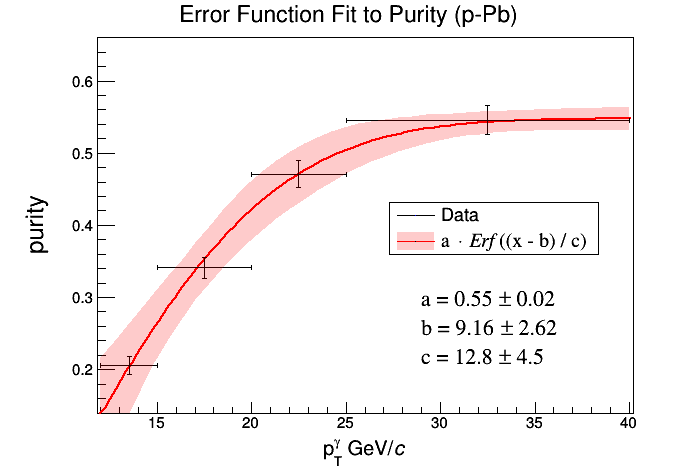

In [6]:
from ROOT import TF1
from ROOT import TMath

pGeV_Edges = np.asarray([12.,15.,20.,25.,40.,55.])
pGeV_Centers = (pGeV_Edges[1:] + pGeV_Edges[:-1]) / 2
pGeV_Widths = [(j-i)/2 for i, j in zip(pGeV_Edges[:-1], pGeV_Edges[1:])]
#print(pGeV_Widths)

Purity = [0.206,0.341,0.471,0.546,0.546]
    
Purity_stat_error = np.asarray([0.012,0.014,0.019,0.020,0.020])
Purity_sys_error = np.asarray([0.029,0.028,0.051,0.045,0.045])

#Purity_errors = np.sqrt(Purity_stat_error**2 + Purity_sys_error**2)
Purity_errors = Purity_stat_error

#print((Purity_errors))

#Fill a TGraph with Purity Information
Purity_Graph = ROOT.TGraphErrors()
for izt in range (len(Purity)):

    Purity_Graph.SetPoint(izt,pGeV_Centers[izt],Purity[izt])
    Purity_Graph.SetPointError(izt,pGeV_Widths[izt],Purity_errors[izt])
    
    #Purity_Graph.SetPointError(izt,0,Purity_errors[izt])
    #Purity_Graph.SetPoint(izt,pGeV_Edges[izt],Purity[izt])

#Define your function and set parameters (notice use of string)
func = TF1("func",'[0]*TMath::Erf((x-[1])/[2])',12,40)
func.SetParameter(0,0.55)
func.SetParameter(1,8.0)
func.SetParameter(2,12.0)

Purity_Graph.Fit("func","S")
#For fitting multiple function on the same canvas, add "+" to the options (S+, or R+)

Fit_Band = ROOT.TGraphErrors(len(Purity));
pGeV_Edges_3 = np.linspace(12,40,40)
for i in range(len(pGeV_Edges_3)):
        Fit_Band.SetPoint(i, pGeV_Edges_3[i], 0)
(ROOT.TVirtualFitter.GetFitter()).GetConfidenceIntervals(Fit_Band,0.68)
    
c = ROOT.TCanvas()
c.SetRightMargin(0.09);
c.SetLeftMargin(0.14);
c.SetBottomMargin(0.125);
c.SetTopMargin(0.08)

Purity_Graph.SetTitle("Error Function Fit to Purity (p-Pb)")
#Purity_Graph.SetMarkerStyle(8)
Purity_Graph.SetMarkerSize(0.5)
Purity_Graph.SetMarkerColorAlpha(4,1.0)
Purity_Graph.Draw("AP")

x = Purity_Graph.GetXaxis()
x.SetRangeUser(12.0,40.0)
x.SetTitle("p_{T}^{#gamma} GeV/#it{c}")
x.SetTitleSize(0.045)
x.SetTitleOffset(1.15)
x.CenterTitle()

y = Purity_Graph.GetYaxis()
y.SetTitleSize(0.055)
y.SetTitle("purity")
y.SetTitleOffset(1.0)
y.CenterTitle()
y.SetRangeUser(0.14,0.66)

fit = Purity_Graph.Fit("func","S")
print(fit)
print fit.Parameters()[0]
print fit.ParError(0)
print fit.Parameters()[1]
print fit.Parameters()[2]

latex = ROOT.TLatex();
latex.SetTextSize(0.05);
latex.SetTextAlign(13);  #align at top
#latex.DrawLatex(25,.35,"#font[12]{a #times Erf((x - b) / c)}")
latex.DrawLatex(29,.31,"#font[132]{a = %1.2f #pm %1.2f}"%(fit.Parameters()[0],fit.ParError(0)))
latex.DrawLatex(29,.27,"#font[132]{b = %1.2f #pm %1.2f}"%(fit.Parameters()[1],fit.ParError(1)))
latex.DrawLatex(29,.23,"#font[132]{c = %1.1f #pm %1.1f}"%(fit.Parameters()[2],fit.ParError(2)))

legend = ROOT.TLegend(0.56,0.46,0.86,0.57)
#legend = ROOT.TLegend(0.18,0.88,0.4,0.75)
legend.AddEntry(Purity_Graph,"Data")
legend.AddEntry(Fit_Band,"#scale[1.1]{#font[132]{a #upoint #it{Erf}((x - b) / c)}}")
legend.Draw()

Fit_Band.SetLineColor(ROOT.kRed);
Fit_Band.SetFillColorAlpha(ROOT.kRed,0.2)
Fit_Band.Draw("same3");
c.Draw()
c.SaveAs("pics/LO/%s/p-Pb_Err_Function_Purity.pdf"%(description_string))

print("")
fit_vals = []
for x in pGeV_Edges_3:
    Err_val = fit.Parameters()[0]*TMath.Erf((x-fit.Parameters()[1])/fit.Parameters()[2])
    fit_vals.append(Err_val)
    print("%1.6f"%(Err_val)),
print("\n")
print("")

0.548570714279
0.017156995984
8.96284200748
12.4629545663

0.147912 0.181011 0.212981 0.243657 0.272896 0.300581 0.326622 0.350955 0.373541 0.394367 0.413443 0.430801 0.446491 0.460579 0.473146 0.484281 0.494083 0.502654 0.510099 0.516523 0.522030 0.526719 0.530685 0.534019 0.536801 0.539108 0.541008 0.542564 0.543828 0.544849 0.545667 0.546320 0.546837 0.547243 0.547560 0.547806 0.547996 0.548142 0.548252 0.548336 


 FCN=0.0760101 FROM MIGRAD    STATUS=CONVERGED      70 CALLS          71 TOTAL
                     EDM=3.19779e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.48570e-01   1.71569e-02   7.88504e-06  -1.60352e-02
   2  p1           8.96288e+00   2.59219e+00   5.92203e-04   8.56749e-05
   3  p2           1.24630e+01   4.39141e+00   9.60945e-04   7.05403e-05
 FCN=0.0760101 FROM MIGRAD    STATUS=CONVERGED      40 C

Info in <TCanvas::Print>: pdf file pics/LO/zT_Rebin_8_006zT06zT13fnew/p-Pb_Err_Function_Purity.pdf has been created


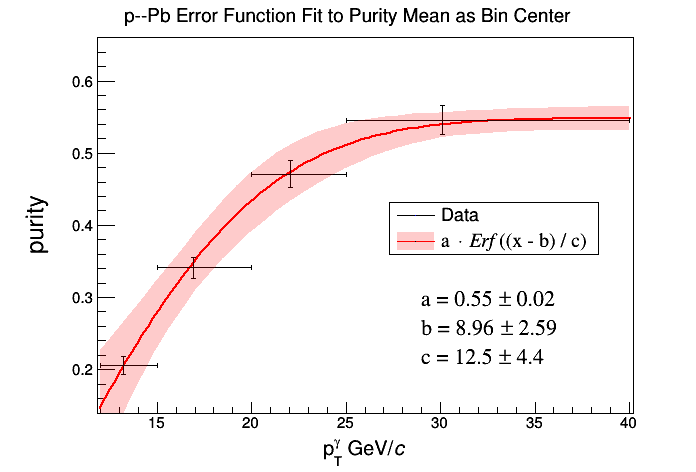

In [7]:
from ROOT import TF1
from ROOT import TMath

pGeV_Edges = np.asarray([12,15,20,25,40,55])
pGeV_Centers = np.asarray([13.198656,16.903571,22.064577,30.107411,45])
pGeV_Widths = [(j-i)/2 for i, j in zip(pGeV_Edges[:-1], pGeV_Edges[1:])]
#print(pGeV_Widths)

Purity = [0.206,0.341,0.471,0.546,0.546]
    
Purity_stat_error = np.asarray([0.012,0.014,0.019,0.020,0.020])
Purity_sys_error = np.asarray([0.029,0.028,0.051,0.045,0.045])

#Purity_errors = np.sqrt(Purity_stat_error**2 + Purity_sys_error**2)
Purity_errors = Purity_stat_error

#print((Purity_errors))

exl = [i-j for i,j in zip(pGeV_Centers,pGeV_Edges[:-1])]
exh = [i-j for i,j in zip(pGeV_Edges[1:],pGeV_Centers)]

x_val = pGeV_Centers
y_val = Purity
x_errL = exl
x_errU = exh
y_errL = Purity_errors
y_errU = Purity_errors
#Purity_Graph = ROOT.TGraphAsymmErrors(len(pGeV_Centers),pGeV_Centers,np.array(Purity),np.array(exl),np.array(exh),Purity_errors,Purity_errors)
Purity_Graph = ROOT.TGraphAsymmErrors(len(x_val), np.array(x_val), np.array(y_val),
                                      np.array(x_errL),np.array(x_errU), np.array(y_errL), np.array(y_errU))

#Define your function and set parameters (notice use of string)
func = TF1("func",'[0]*TMath::Erf((x-[1])/[2])',12,40)
func.SetParameter(0,0.55)
func.SetParameter(1,8.0)
func.SetParameter(2,12.0)

Purity_Graph.Fit("func","S")
#For fitting multiple function on the same canvas, add "+" to the options (S+, or R+)

Fit_Band = ROOT.TGraphErrors(len(Purity));
pGeV_Edges_3 = np.linspace(12,40,40)
for i in range(len(pGeV_Edges_3)):
        Fit_Band.SetPoint(i, pGeV_Edges_3[i], 0)
(ROOT.TVirtualFitter.GetFitter()).GetConfidenceIntervals(Fit_Band,0.68)
    
c = ROOT.TCanvas()
c.SetRightMargin(0.09);
c.SetLeftMargin(0.14);
c.SetBottomMargin(0.125);
c.SetTopMargin(0.08)

Purity_Graph.SetTitle("p--Pb Error Function Fit to Purity Mean as Bin Center")
#Purity_Graph.SetMarkerStyle(8)
Purity_Graph.SetMarkerSize(0.5)
Purity_Graph.SetMarkerColorAlpha(4,1.0)
Purity_Graph.Draw("AP")

x = Purity_Graph.GetXaxis()
x.SetRangeUser(12.0,40.0)
x.SetTitle("p_{T}^{#gamma} GeV/#it{c}")
x.SetTitleSize(0.045)
x.SetTitleOffset(1.15)
x.CenterTitle()

y = Purity_Graph.GetYaxis()
y.SetTitleSize(0.055)
y.SetTitle("purity")
y.SetTitleOffset(1.0)
y.CenterTitle()
y.SetRangeUser(0.14,0.66)

fit = Purity_Graph.Fit("func","S")
print(fit)
print fit.Parameters()[0]
print fit.ParError(0)
print fit.Parameters()[1]
print fit.Parameters()[2]

latex = ROOT.TLatex();
latex.SetTextSize(0.05);
latex.SetTextAlign(13);  #align at top
#latex.DrawLatex(25,.35,"#font[12]{a #times Erf((x - b) / c)}")
latex.DrawLatex(29,.31,"#font[132]{a = %1.2f #pm %1.2f}"%(fit.Parameters()[0],fit.ParError(0)))
latex.DrawLatex(29,.27,"#font[132]{b = %1.2f #pm %1.2f}"%(fit.Parameters()[1],fit.ParError(1)))
latex.DrawLatex(29,.23,"#font[132]{c = %1.1f #pm %1.1f}"%(fit.Parameters()[2],fit.ParError(2)))

legend = ROOT.TLegend(0.56,0.46,0.86,0.57)
#legend = ROOT.TLegend(0.18,0.88,0.4,0.75)
legend.AddEntry(Purity_Graph,"Data")
legend.AddEntry(Fit_Band,"#scale[1.1]{#font[132]{a #upoint #it{Erf}((x - b) / c)}}")
legend.Draw()

Fit_Band.SetLineColor(ROOT.kRed);
Fit_Band.SetFillColorAlpha(ROOT.kRed,0.2)
Fit_Band.Draw("same3");
c.Draw()
c.SaveAs("pics/LO/%s/p-Pb_Err_Function_Purity.pdf"%(description_string))

print("")
fit_vals = []
for x in pGeV_Edges_3:
    Err_val = fit.Parameters()[0]*TMath.Erf((x-fit.Parameters()[1])/fit.Parameters()[2])
    fit_vals.append(Err_val)
    print("%1.6f"%(Err_val)),
print("\n")
print("")

# p-Pb Overlay (Bin Centers)

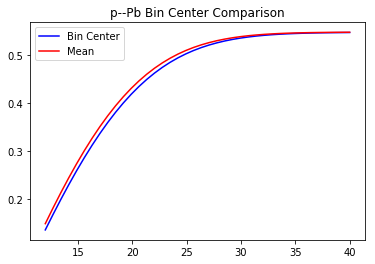

In [8]:

#print("pT GeV/c:  "),
#for i in range(len(pGeV_Edges_3)):
    #print(pGeV_Edges_3[i]),
#print("")

fit_vals_pp = []
fit_vals_pPb = []

#print fit.Parameters()[0]
#print fit.Parameters()[1]
#print fit.Parameters()[2]

#PMean
0.548570714279
8.96284200748
12.4629545663

#Center
0.548153014137
9.15537168506
12.8368031531
#print("Purity Val:"),
for x in pGeV_Edges_3:
    Err_val_pPb = 0.548570714279*TMath.Erf((x-8.96284200748)/12.4629545663)#mean=center bin
    Err_val_pp = 0.548153014137*TMath.Erf((x-9.15537168506)/12.8368031531)
    
    fit_vals_pp.append(Err_val_pp)
    fit_vals_pPb.append(Err_val_pPb)

    #print("%1.6f"%(Err_val)),
#print("")

fit_errors = []
#print("P Uncert.: "),
for i in range(len(pGeV_Edges_3)):
    fit_errors.append(Fit_Band.GetErrorY(i))
    #print("%1.2f"%(Fit_Band.GetErrorY(i))),
#print("\n")

purity_plot = plt.plot(pGeV_Edges_3,fit_vals_pp,color="blue",label="Bin Center")
#purity_plot[0].SetTitle("p--Pb Bin Center Comparison")
plt.plot(pGeV_Edges_3,fit_vals_pPb,color="red",label="Mean")
#plt.plot(pGeV_Edges_3,fit_vals_New,color="cyan",label="Bit Centers")
#plt.errorbar(pGeV_Centers,Purity,xerr=pGeV_Widths,color="k",label="Data")
plt.legend()
plt.title("p--Pb Bin Center Comparison")

# pp Overlay (Bin Centers)

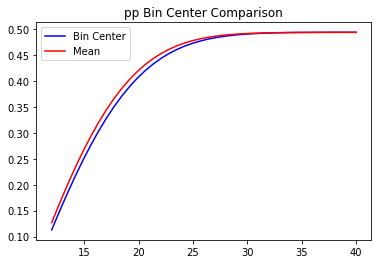

In [9]:

#print("pT GeV/c:  "),
#for i in range(len(pGeV_Edges_3)):
    #print(pGeV_Edges_3[i]),
#print("")

fit_vals_pp = []
fit_vals_pPb = []

#print fit.Parameters()[0]
#print fit.Parameters()[1]
#print fit.Parameters()[2]

#PMean
0.493663167953
9.65539050112
10.113534771

#Center
0.49393076244
9.8267810911
10.5842593653
#print("Purity Val:"),
for x in pGeV_Edges_3:
    Err_val_pPb = 0.493663167953493663167953*TMath.Erf((x-9.65539050112)/10.113534771)#mean=center bin
    Err_val_pp = 0.49393076244*TMath.Erf((x-9.8267810911)/10.5842593653)
    
    fit_vals_pp.append(Err_val_pp)
    fit_vals_pPb.append(Err_val_pPb)

    #print("%1.6f"%(Err_val)),
#print("")

fit_errors = []
#print("P Uncert.: "),
for i in range(len(pGeV_Edges_3)):
    fit_errors.append(Fit_Band.GetErrorY(i))
    #print("%1.2f"%(Fit_Band.GetErrorY(i))),
#print("\n")

purity_plot = plt.plot(pGeV_Edges_3,fit_vals_pp,color="blue",label="Bin Center")
#purity_plot[0].SetTitle("p--Pb Bin Center Comparison")
plt.plot(pGeV_Edges_3,fit_vals_pPb,color="red",label="Mean")
#plt.plot(pGeV_Edges_3,fit_vals_New,color="cyan",label="Bit Centers")
#plt.errorbar(pGeV_Centers,Purity,xerr=pGeV_Widths,color="k",label="Data")
plt.legend()
plt.title("pp Bin Center Comparison")

## pPb Error Funciton [TPC]

[0.04025348 0.04055159 0.03536341 0.03892705]
0.569429959156
0.043845949608
8.1906528936
11.8993694765

0.198878 0.233161 0.265906 0.296956 0.326185 0.353500 0.378842 0.402183 0.423525 0.442897 0.460354 0.475971 0.489841 0.502070 0.512774 0.522075 0.530099 0.536971 0.542812 0.547743 0.551875 0.555311 0.558149 0.560476 0.562369 0.563899 0.565126 0.566104 0.566876 0.567482 0.567955 0.568320 0.568600 0.568814 0.568976 0.569098 0.569188 0.569255 0.569305 0.569341 


 FCN=0.355288 FROM MIGRAD    STATUS=CONVERGED      68 CALLS          69 TOTAL
                     EDM=2.25197e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.69430e-01   4.38461e-02   1.66335e-05  -1.64037e-03
   2  p1           8.19067e+00   3.07927e+00   6.11301e-04   5.99631e-05
   3  p2           1.18994e+01   5.93699e+00   1.00496e-03   3.55440e-05
 FCN=0.35528

Info in <TCanvas::Print>: pdf file pics/LO/zT_Rebin_8_006zT06zT13fnew/p-Pb_Err_Function_Purity.pdf has been created


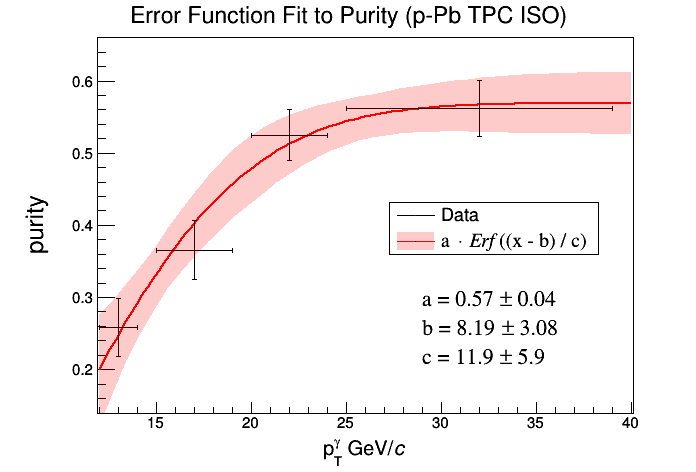

In [10]:
from ROOT import TF1
from ROOT import TMath

pGeV_Edges = np.asarray([12,15,20,25,40,55])
pGeV_Centers = (pGeV_Edges[1:] + pGeV_Edges[:-1]) / 2
pGeV_Widths = [(j-i)/2 for i, j in zip(pGeV_Edges[:-1], pGeV_Edges[1:])]
#print(pGeV_Widths)

Purity = np.asarray([25.795882408552828, 36.573026363625466, 52.45982806407359, 56.24886093747641])
Purity = Purity/100.0

Purity_stat_error = np.asarray([0.9363451404263521, 1.0956429868524769, 1.5824719683037447, 1.7597194355771617])
Purity_stat_error = Purity_stat_error/100.0

Purity_sys_error = np.asarray([3.9149307671379363, 3.904341019204986, 3.1625132078047757, 3.4722528826397836])
Purity_sys_error = Purity_sys_error/100.0

Purity_errors = np.sqrt(Purity_stat_error**2 + Purity_sys_error**2)

print((Purity_errors))

#Fill a TGraph with Purity Information
Purity_Graph = ROOT.TGraphErrors()
for izt in range (len(Purity)):

    Purity_Graph.SetPoint(izt,pGeV_Centers[izt],Purity[izt])
    Purity_Graph.SetPointError(izt,pGeV_Widths[izt],Purity_errors[izt])
    
    #Purity_Graph.SetPointError(izt,0,Purity_errors[izt])
    #Purity_Graph.SetPoint(izt,pGeV_Edges[izt],Purity[izt])

#Define your function and set parameters (notice use of string)
func = TF1("func",'[0]*TMath::Erf((x-[1])/[2])',12,40)
func.SetParameter(0,0.55)
func.SetParameter(1,8.0)
func.SetParameter(2,12.0)

Purity_Graph.Fit("func","S")

Fit_Band = ROOT.TGraphErrors(len(Purity));
pGeV_Edges_3 = np.linspace(12,40,40)
for i in range(len(pGeV_Edges_3)):
        Fit_Band.SetPoint(i, pGeV_Edges_3[i], 0)
(ROOT.TVirtualFitter.GetFitter()).GetConfidenceIntervals(Fit_Band,0.68)
    
c = ROOT.TCanvas()
c.SetRightMargin(0.09);
c.SetLeftMargin(0.14);
c.SetBottomMargin(0.125);
c.SetTopMargin(0.08)

Purity_Graph.SetTitle("Error Function Fit to Purity (p-Pb TPC ISO)")
#Purity_Graph.SetMarkerStyle(8)
Purity_Graph.SetMarkerSize(0.5)
Purity_Graph.SetMarkerColorAlpha(4,1.0)
Purity_Graph.Draw("AP")

x = Purity_Graph.GetXaxis()
x.SetRangeUser(12.0,40.0)
x.SetTitle("p_{T}^{#gamma} GeV/#it{c}")
x.SetTitleSize(0.045)
x.SetTitleOffset(1.15)
x.CenterTitle()

y = Purity_Graph.GetYaxis()
y.SetTitleSize(0.055)
y.SetTitle("purity")
y.SetTitleOffset(1.0)
y.CenterTitle()
y.SetRangeUser(0.14,0.66)

fit = Purity_Graph.Fit("func","S")
print(fit)
print fit.Parameters()[0]
print fit.ParError(0)
print fit.Parameters()[1]
print fit.Parameters()[2]

latex = ROOT.TLatex();
latex.SetTextSize(0.05);
latex.SetTextAlign(13);  #align at top
#latex.DrawLatex(25,.35,"#font[12]{a #times Erf((x - b) / c)}")
latex.DrawLatex(29,.31,"#font[132]{a = %1.2f #pm %1.2f}"%(fit.Parameters()[0],fit.ParError(0)))
latex.DrawLatex(29,.27,"#font[132]{b = %1.2f #pm %1.2f}"%(fit.Parameters()[1],fit.ParError(1)))
latex.DrawLatex(29,.23,"#font[132]{c = %1.1f #pm %1.1f}"%(fit.Parameters()[2],fit.ParError(2)))

legend = ROOT.TLegend(0.56,0.46,0.86,0.57)
#legend = ROOT.TLegend(0.18,0.88,0.4,0.75)
legend.AddEntry(Purity_Graph,"Data")
legend.AddEntry(Fit_Band,"#scale[1.1]{#font[132]{a #upoint #it{Erf}((x - b) / c)}}")
legend.Draw()

Fit_Band.SetLineColor(ROOT.kRed);
Fit_Band.SetFillColorAlpha(ROOT.kRed,0.2)
Fit_Band.Draw("same3");
c.Draw()
c.SaveAs("pics/LO/%s/p-Pb_Err_Function_Purity.pdf"%(description_string))

print("")
fit_vals = []
for x in pGeV_Edges_3:
    Err_val = fit.Parameters()[0]*TMath.Erf((x-fit.Parameters()[1])/fit.Parameters()[2])
    fit_vals.append(Err_val)
    print("%1.6f"%(Err_val)),
print("\n")
print("")

## Compare pp and p-Pb Fits

0.569429959156
8.1906528936
11.8993694765


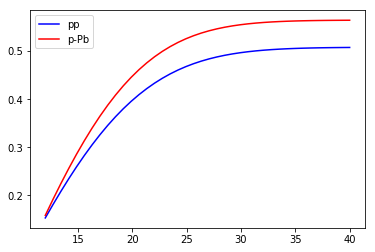

In [11]:

#print("pT GeV/c:  "),
#for i in range(len(pGeV_Edges_3)):
    #print(pGeV_Edges_3[i]),
#print("")

fit_vals_pp = []
fit_vals_pPb = []

print fit.Parameters()[0]
print fit.Parameters()[1]
print fit.Parameters()[2]


0.507999134652
0.0665645483397
8.33474628579
13.3714887905

#print("Purity Val:"),
for x in pGeV_Edges_3:
    Err_val_pPb = 0.564400011365*TMath.Erf((x-8.81589638183)/12.5209151159)
    Err_val_pp = 0.507999134652*TMath.Erf((x-8.33474628579)/13.3714887905)
    
    fit_vals_pp.append(Err_val_pp)
    fit_vals_pPb.append(Err_val_pPb)

    #print("%1.6f"%(Err_val)),
#print("")

fit_errors = []
#print("P Uncert.: "),
for i in range(len(pGeV_Edges_3)):
    fit_errors.append(Fit_Band.GetErrorY(i))
    #print("%1.2f"%(Fit_Band.GetErrorY(i))),
#print("\n")

plt.plot(pGeV_Edges_3,fit_vals_pp,color="blue",label="pp")
plt.plot(pGeV_Edges_3,fit_vals_pPb,color="red",label="p-Pb")
#plt.plot(pGeV_Edges_3,fit_vals_New,color="cyan",label="Bit Centers")
#plt.errorbar(pGeV_Centers,Purity,xerr=pGeV_Widths,color="k",label="Data")
plt.legend()

# Compare mean and center bins

0.569429959156
8.1906528936
11.8993694765


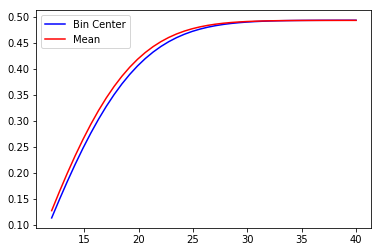

In [12]:

#print("pT GeV/c:  "),
#for i in range(len(pGeV_Edges_3)):
    #print(pGeV_Edges_3[i]),
#print("")

fit_vals_pp = []
fit_vals_pPb = []

print fit.Parameters()[0]
print fit.Parameters()[1]
print fit.Parameters()[2]

#Mean
0.493663167953
9.65539050112
10.113534771

#Regular Center PP
0.49393076244
9.8267810911
10.5842593653
#print("Purity Val:"),
for x in pGeV_Edges_3:
    Err_val_pPb = 0.493663167953*TMath.Erf((x-9.65539050112)/10.113534771)#mean=center bin
    Err_val_pp = 0.49393076244*TMath.Erf((x-9.8267810911)/10.5842593653)
    
    fit_vals_pp.append(Err_val_pp)
    fit_vals_pPb.append(Err_val_pPb)

    #print("%1.6f"%(Err_val)),
#print("")

fit_errors = []
#print("P Uncert.: "),
for i in range(len(pGeV_Edges_3)):
    fit_errors.append(Fit_Band.GetErrorY(i))
    #print("%1.2f"%(Fit_Band.GetErrorY(i))),
#print("\n")

purity_plot = plt.plot(pGeV_Edges_3,fit_vals_pp,color="blue",label="Bin Center")
plt.plot(pGeV_Edges_3,fit_vals_pPb,color="red",label="Mean")
#plt.plot(pGeV_Edges_3,fit_vals_New,color="cyan",label="Bit Centers")
#plt.errorbar(pGeV_Centers,Purity,xerr=pGeV_Widths,color="k",label="Data")
plt.legend()

0.569429959156
8.1906528936
11.8993694765


RuntimeError: xdata and ydata must be the same length

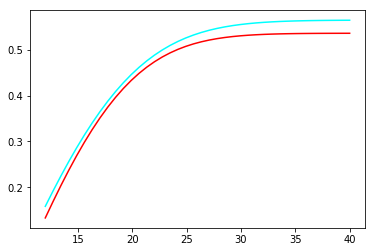

In [13]:

#print("pT GeV/c:  "),
#for i in range(len(pGeV_Edges_3)):
    #print(pGeV_Edges_3[i]),
#print("")

fit_vals_New = []
fit_vals = []
fit_vals_Old = []
print fit.Parameters()[0]
print fit.Parameters()[1]
print fit.Parameters()[2]


#print("Purity Val:"),
for x in pGeV_Edges_3:
    #Err_val_Old = 0.542257*TMath.Erf((x-8.09242)/11.8085)
    Err_val_Old = 0.535827209253*TMath.Erf((x-9.46305649534)/11.3188096455)
    Err_val = 0.539705386488*TMath.Erf((x-8.88586771026)/12.2892853578)
    Err_val_New = 0.564400011365*TMath.Erf((x-8.81589638183)/12.5209151159)
    
    fit_vals.append(Err_val)
    fit_vals_Old.append(Err_val_Old)
    fit_vals_New.append(Err_val_New)
    #print("%1.6f"%(Err_val)),
#print("")

fit_errors = []
#print("P Uncert.: "),
for i in range(len(pGeV_Edges_3)):
    fit_errors.append(Fit_Band.GetErrorY(i))
    #print("%1.2f"%(Fit_Band.GetErrorY(i))),
#print("\n")

#plt.plot(pGeV_Edges_3,fit_vals,color="blue",label="Bin Centers, No X-Err")
plt.plot(pGeV_Edges_3,fit_vals_Old,color="red",label="Bin Edges, No X-Err")
plt.plot(pGeV_Edges_3,fit_vals_New,color="cyan",label="Latest, fewer Bins")
plt.errorbar(pGeV_Centers,Purity,xerr=pGeV_Widths,color="k",label="Data")
plt.legend()

In [ ]:
#Old Purity Val: 0.195322 0.257569 0.313537 0.362468 0.404063 0.438445 0.466078 0.487672 0.504081 0.516205 0.524915 0.531000 0.535132 0.537862 0.539615 0.540709 0.541374 0.541766 0.541991 0.542117 0.542185
#New Purity Val: 0.152395 0.214219 0.271331 0.322836 0.368178 0.407144 0.439834 0.466605 0.488008 0.504711 0.517436 0.526900 0.533771 0.538641 0.542010 0.544285 0.545785 0.546751 0.547358 0.547730 0.547952 
#P Uncert :      0.03 0.02 0.02 0.02 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.03 0.04 0.04 0.04 0.04 0.04 0.04 0.04 0.04

In [ ]:
#Shower_Shape = "NN"

File = '../InputData/zT_Rebin_8_006zT06zT13fnew_track_spectra/pPb_SE_L0_Correlation.root'
file = ROOT.TFile(File)

File2 ='../InputData/zT_Rebin_8_006zT06zT13fnewChi2_track_spectra/pPb_SE_L0_Correlation.root'
file2 = ROOT.TFile(File2)

N_Sig_histo = 1
N_Sig = 1
N_BKG_histo = 1
N_BKG = 1
print(N_BKG)

#SIG = file.Get("Raw_Track_Spectra")
#BKGD = file2.Get("Raw_Track_Spectra")
#BKGD_W = file2.Get("Raw_Track_Spectra")

SIG = file.Get("Weight_Track_Spectra")
BKGD = file2.Get("Weight_Track_Spectra")
BKGD_W = file2.Get("Weight_Track_Spectra")


#SIG.Rebin(10)
Signal = root_numpy.hist2array(SIG)



#BKGD.Rebin(10)
Background = root_numpy.hist2array(BKGD)


#BKGD_W.Rebin(10)
Background_W = root_numpy.hist2array(BKGD_W)


N_Bins = SIG.GetSize() - 2 #Ignero under/overflow
S_Error = np.zeros(N_Bins)
B_Error = np.zeros(N_Bins)
BW_Error = np.zeros(N_Bins)
for i in range(1,N_Bins+1):
    S_Error[i-1] = SIG.GetBinError(i)*0
    B_Error[i-1] = BKGD.GetBinError(i)
    BW_Error[i-1] = BKGD_W.GetBinError(i)
    
    
Take_Ratios = True

if Take_Ratios:
    Background = Background/Signal
    B_Error = np.sqrt((B_Error/Background)**2 + (S_Error/Signal)**2)*Background*0
    
    Background_W = Background_W/Signal
    BW_Error = np.sqrt((BW_Error/Background_W)**2 + (S_Error/Signal)**2)
    Signal=Signal/Signal

pT_Axis = np.linspace(0.5,8,N_Bins)

fig = plt.figure(figsize=(10,7))

plt.errorbar(pT_Axis,Signal,yerr = S_Error,label="$\chi^2 < 36$ Corrected")
plt.errorbar(pT_Axis,Background,yerr = B_Error,label="$\chi^2 < 2 / \chi^2 < 36$ Corrected")
plt.title(r"$\chi^2$ Corrected Comparison")
#plt.ylim(0.8,1.2)
    
plt.xlabel(r'Cluster $p_{\mathrm{T}}$')
#plt.ylabel(r'$\frac{1}{N_{\gamma}}\cdot dN$')
plt.legend()
fig.savefig('pics/Cluster_pT_Weighted.pdf', bbox_inches='tight')

[1.5, 2.5, 2.5, 7.5, 7.5]
[0.05502727 0.04104875 0.07155418 0.08947067 0.08947067]
0.180521323057
2
0.493932365046
0.0607690769358
9.82673742612
10.5841533237

0.112852 0.148543 0.182936 0.215775 0.246844 0.275969 0.303022 0.327919 0.350624 0.371139 0.389507 0.405800 0.420123 0.432596 0.443361 0.452565 0.460363 0.466910 0.472356 0.476844 0.480509 0.483475 0.485853 0.487742 0.489229 0.490389 0.491285 0.491971 0.492492 0.492883 0.493175 0.493390 0.493548 0.493662 0.493744 0.493802 0.493843 0.493872 0.493891 0.493905 


 FCN=0.180521 FROM MIGRAD    STATUS=CONVERGED      77 CALLS          78 TOTAL
                     EDM=2.21634e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.93932e-01   6.07691e-02   2.47913e-05   3.41131e-03
   2  p1           9.82674e+00   3.93740e+00   7.87757e-04  -9.20864e-05
   3  p2           1.05842e+0

Info in <TCanvas::Print>: pdf file pics/LO/zT_Rebin_8_006zT06zT13fnew/pp_Err_Function_Purity.pdf has been created


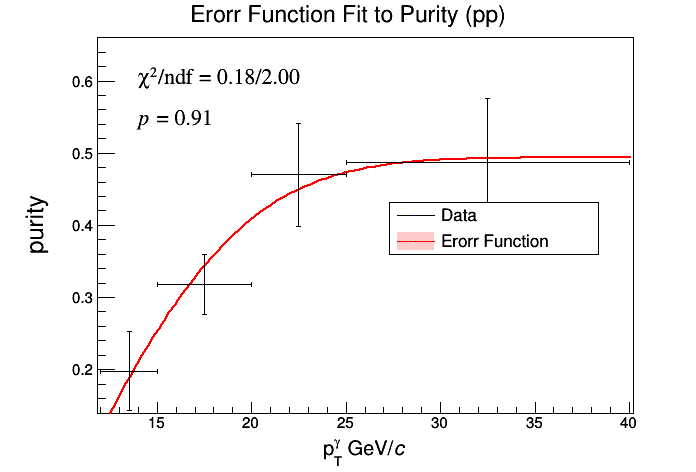

In [10]:
from ROOT import TF1
from ROOT import TMath

pGeV_Edges = np.asarray([12.,15.,20.,25.,40.,55.])
pGeV_Centers = (pGeV_Edges[1:] + pGeV_Edges[:-1]) / 2
pGeV_Widths = [(j-i)/2 for i, j in zip(pGeV_Edges[:-1], pGeV_Edges[1:])]
print(pGeV_Widths)

Purity = [0.198,0.318,0.470,0.487,0.487]
    
Purity_stat_error = np.asarray([0.018,0.023,0.032,0.038,0.038])
Purity_sys_error = np.asarray([0.052,0.034,0.064,0.081,0.081])

Purity_errors = np.sqrt(Purity_stat_error**2 + Purity_sys_error**2)

print((Purity_errors))

#Fill a TGraph with Purity Information
Purity_Graph = ROOT.TGraphErrors()
for izt in range (len(Purity)):

    Purity_Graph.SetPoint(izt,pGeV_Centers[izt],Purity[izt])
    Purity_Graph.SetPointError(izt,pGeV_Widths[izt],Purity_errors[izt])
    
    #Purity_Graph.SetPointError(izt,0,Purity_errors[izt])
    #Purity_Graph.SetPoint(izt,pGeV_Edges[izt],Purity[izt])

#Define your function and set parameters (notice use of string)
func = TF1("func",'[0]*TMath::Erf((x-[1])/[2])',13.5,40)
func.SetParameter(0,0.55)
func.SetParameter(1,8.0)
func.SetParameter(2,12.0)
pol = 'Erorr Function'

#pol = 'gaus'
#func = TF1("func",pol,13.5,40)
    
c = ROOT.TCanvas()
c.SetRightMargin(0.09);
c.SetLeftMargin(0.14);
c.SetBottomMargin(0.125);
c.SetTopMargin(0.08)

Purity_Graph.SetTitle(pol+" Fit to Purity (pp)")
#Purity_Graph.SetMarkerStyle(8)
Purity_Graph.SetMarkerSize(0.5)
Purity_Graph.SetMarkerColorAlpha(4,1.0)
Purity_Graph.Draw("AP")

x = Purity_Graph.GetXaxis()
x.SetRangeUser(12.0,40.0)
x.SetTitle("p_{T}^{#gamma} GeV/#it{c}")
x.SetTitleSize(0.045)
x.SetTitleOffset(1.15)
x.CenterTitle()

y = Purity_Graph.GetYaxis()
y.SetTitleSize(0.055)
y.SetTitle("purity")
y.SetTitleOffset(1.0)
y.CenterTitle()
y.SetRangeUser(0.14,0.66)

fit = Purity_Graph.Fit("func","S")
print(fit.Chi2())
print(fit.Ndf())
print fit.Parameters()[0]
print fit.ParError(0)
print fit.Parameters()[1]
print fit.Parameters()[2]

latex = ROOT.TLatex();
latex.SetTextSize(0.05);
latex.SetTextAlign(13);  #align at top
#latex.DrawLatex(29,.31,"#font[132]{a = %1.2f #pm %1.2f}"%(fit.Parameters()[0],fit.ParError(0)))
#latex.DrawLatex(29,.27,"#font[132]{b = %1.2f #pm %1.2f}"%(fit.Parameters()[1],fit.ParError(1)))
#latex.DrawLatex(29,.23,"#font[132]{c = %1.1f #pm %1.1f}"%(fit.Parameters()[2],fit.ParError(2)))

latex.DrawLatex(14,0.62,"#font[132]{#chi^{2}/ndf = %1.2f/%1.2f}"%(fit.Chi2(),fit.Ndf()))
latex.DrawLatex(14,0.56,"#font[132]{#it{p} = %1.2f}"%(fit.Prob()))

legend = ROOT.TLegend(0.56,0.46,0.86,0.57)
#legend = ROOT.TLegend(0.18,0.88,0.4,0.75)
legend.AddEntry(Purity_Graph,"Data")
legend.AddEntry(Fit_Band,pol)
legend.Draw()

c.Draw()
c.SaveAs("pics/LO/%s/pp_Err_Function_Purity.pdf"%(description_string))

print("")
fit_vals = []
for x in pGeV_Edges_3:
    Err_val = fit.Parameters()[0]*TMath.Erf((x-fit.Parameters()[1])/fit.Parameters()[2])
    fit_vals.append(Err_val)
    print("%1.6f"%(Err_val)),
print("\n")
print("")

In [ ]:
#Shower_Shape = "NN"
Shower_Shape = "L0"

if (Shower_Shape=="NN"):
    File = '../InputData/13f_SE_NN_Correlation.root'
elif (Shower_Shape=="L0"):
    File = '../InputData/zT_Rebin_8_006zT06zTWeightTest/13f_SE_L0_Correlation.root'
file = ROOT.TFile(File)

N_Sig_histo = file.Get("N_DNN1_Triggers_pT12_40")
N_Sig = N_Sig_histo.GetEntries()
N_BKG_histo = file.Get("N_DNN2_Triggers_pT12_40")
N_BKG = N_BKG_histo.GetEntries()


SIG = file.Get("Signal_pT_Dist")
#SIG.Rebin(4)
print(SIG.GetEntries())
BKGD = file.Get("BKGD_pT_Dist")
#BKGD.Rebin(4)
print(BKGD.GetEntries())
BKGD_W = file.Get("BKGD_pT_Dist_Weighted")
#BKGD_W.Rebin(4)

#SIG.Rebin(10)
Signal = root_numpy.hist2array(SIG)
S_Scale = Signal.sum(axis=0)
Signal = Signal/S_Scale


#BKGD.Rebin(10)
Background = root_numpy.hist2array(BKGD)
B_Scale = Background.sum(axis=0)
Background = Background/B_Scale

#BKGD_W.Rebin(10)
Background_W = root_numpy.hist2array(BKGD_W)
B_Scale_W = Background_W.sum(axis=0)
Background_W = Background_W/B_Scale_W

N_Bins = SIG.GetSize() - 2 #Ignero under/overflow
S_Error = np.zeros(N_Bins)
B_Error = np.zeros(N_Bins)
BW_Error = np.zeros(N_Bins)
for i in range(1,N_Bins+1):
    S_Error[i-1] = SIG.GetBinError(i)
    print(SIG.GetBinError(i))
    B_Error[i-1] = BKGD.GetBinError(i)
    BW_Error[i-1] = BKGD_W.GetBinError(i)
    
S_Error = S_Error/S_Scale
B_Error = B_Error/B_Scale
BW_Error = BW_Error/B_Scale_W
    
    
Take_Ratios = True

if Take_Ratios:
    Background = Background/Signal
    B_Error = np.sqrt((BW_Error/Background)**2 + (S_Error/Signal)**2)
    
    Background_W = Background_W/Signal
    BW_Error = np.sqrt((BW_Error/Background_W)**2 + (S_Error/Signal)**2)
    Signal=Signal/Signal
    
print(Signal.size)
print(S_Error.size)

pT_Axis = np.linspace(10,40,N_Bins)

fig = plt.figure(figsize=(10,7))
if (Shower_Shape=="NN"):
    plt.errorbar(pT_Axis,Signal,yerr = S_Error,label="Signal Region Clusters (0.55 < NN < 0.85)")
    plt.errorbar(pT_Axis,Background,yerr = B_Error,label="Background Region Clusters (NN < 0.4)")
    plt.errorbar(pT_Axis,Background_W,yerr = BW_Error,fmt = "--r",label="Weighted Background Clusters (NN < 0.4)")
    plt.title(r"Isolated Cluster $p_{\mathrm{T}}$ Distribution  $DNN$")

elif (Shower_Shape=="L0"):
    plt.errorbar(pT_Axis,Signal,yerr = S_Error,label="Signal Region Clusters ($\lambda^{2}_{0}$ < 0.3)")
    plt.errorbar(pT_Axis,Background,yerr = B_Error,label="Background Region Clusters ($\lambda^{2}_{0}$ > 0.4)")
    plt.errorbar(pT_Axis,Background_W,yerr = BW_Error,fmt = "--r",label="Weighted Bkg Region Clusters ($\lambda^{2}_{0}$ > 0.4)")
    plt.title(r"Isolated Cluster $p_{\mathrm{T}}$ Distribution  $\lambda^{2}_{0}$")
    #plt.ylim(0,0.01)
    
plt.xlabel(r'Cluster $p_{\mathrm{T}}$')
#plt.ylabel(r'$\frac{1}{N_{\gamma}}\cdot dN$')
plt.legend()
fig.savefig('pics/Cluster_pT_Weighted.pdf', bbox_inches='tight')



## Tracking Plots

In [ ]:
Trak_pT_Bin_Edges = np.asarray([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,1.1,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.6,4.0,5.0,6.0,8.0,10.0,13.0])
Track_pT_Bin_Centers = (Trak_pT_Bin_Edges[1:] + Trak_pT_Bin_Edges[:-1]) / 2
N = np.size(Track_pT_Bin_Centers)

pp_pT_Smearing = [1.00905, 1.00653, 1.00859, 1.00616, 0.997317, 1.00387, 0.993037, 1.00025, 0.994664, 0.99143, 1.00412, 0.994017, 0.989386, 0.995787, 0.987843, 0.990099, 0.972225, 0.997532, 0.975834, 0.971739, 0.939599, 0.951686, 0.971399, 0.904032, 0.915311, 0.897727, 0.670429, 0.666667, 0.512195] 
#pp_pT_Smearing = pp_pT_Smearing[-N:]

pPb_pT_Smearing = [1.00998, 1.00622, 1.00519, 1.00425, 1.00182, 0.99553, 0.992115, 0.991085, 0.989869, 0.988516, 0.987711, 0.989906, 0.990167, 0.994517, 0.994247, 0.99273, 0.983717, 0.986158, 0.978648, 0.986939, 0.963266, 0.959108, 0.945863, 0.923434, 0.896206, 0.86263, 0.71868, 0.629909, 0.425061]
#pPb_pT_Smearing = pPb_pT_Smearing[-N:]

old_pPb = [1.007,1.007,0.982,0.957,0.926,0.894,0.853,0.817,0.757,0.681,0.673,0.619,0.469,0.342,0.301]
old_pt_bins = np.asarray([0.05,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
old_centers = (old_pt_bins[1:] + old_pt_bins[:-1]) / 2

plt.plot(Track_pT_Bin_Centers,pPb_pT_Smearing,marker="o",label="p-Pb")
plt.plot(Track_pT_Bin_Centers,pp_pT_Smearing,marker="o",label="pp")
plt.plot(old_centers,old_pPb,marker="o",label="old")
plt.legend()
plt.title("pT Bin Migration Correction in pp and p-Pb")

In [ ]:
print(len(Trak_pT_Bin_Edges))
print(len(Track_pT_Bin_Centers))


In [ ]:
Trak_pT_Bin_Edges = np.asarray([0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1.0,1.1,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.6,4.0,5.0,6.0,8.0,10.0,13.0,20.0])
Track_pT_Bin_Centers = (Trak_pT_Bin_Edges[1:] + Trak_pT_Bin_Edges[:-1]) / 2
N = np.size(Track_pT_Bin_Centers)

pp_Fake_Rate = [0.0250246,0.0250246, 0.0245797, 0.0242376, 0.0240682, 0.023281, 0.0246955, 0.0235495, 0.0230017, 0.0236568, 0.022912, 0.0237135, 0.0229813, 0.0223819, 0.0223993, 0.0238591, 0.0252843, 0.0253992, 0.0250655, 0.0254672, 0.0271102, 0.0272849, 0.0233524, 0.0321137, 0.040308, 0.0611087, 0.0730563, 0.13447, 0.148867, 0.292818]
#pp_pT_Smearing = pp_pT_Smearing[-N:]

pPb_Fake_Rate = [0.0184162,0.0184162, 0.0180536, 0.0175808, 0.0177315, 0.017413, 0.0172551, 0.0175637, 0.017715, 0.0172888, 0.0178326, 0.0178794, 0.0179673, 0.0177509, 0.0182945, 0.0181996, 0.0188647, 0.0190429, 0.0202744, 0.0209381, 0.0213728, 0.0237848, 0.0251898, 0.0297774, 0.0350703, 0.0518793, 0.0804111, 0.137953, 0.214123, 0.301459]
#pPb_pT_Smearing = pPb_pT_Smearing[-N:]

old_pPb_fake_rate = np.asarray([0.9821,0.9821,0.9803,0.9751,0.9645,0.9525,0.9278,0.9098,0.8702,0.8593,0.7870,0.7825,0.7624,0.7389,0.6710])
old_fake_rate = 1.0-old_pPb_fake_rate

plt.plot(Track_pT_Bin_Centers,pPb_Fake_Rate,marker="o",label="p-Pb")
plt.plot(Track_pT_Bin_Centers,pp_Fake_Rate,marker="o",label="pp")
plt.plot(old_centers,old_fake_rate,marker="o",label="old")
plt.legend()
plt.title("Fake Rate Correction in pp and p-Pb")

In [ ]:
print(len(pPb_Fake_Rate))
print(old_fake_rate)

In [ ]:
pp_Efficiency = [0.833835601807,0.836869120598,0.839235246181,0.841083467007,0.843128025532,0.84164339304,0.844368815422,0.843157708645,0.842828392982,0.844945728779,0.846174120903,0.849676072598,0.85161960125,0.851656377316,0.855973064899,0.859771847725,0.856857895851,0.856580495834,0.866534769535,0.862415850163,0.864510595798,0.863728642464,0.871034324169,0.870704054832,0.872091054916,0.867180407047,0.848246216774,0.860869586468,0.887700557709]
#pp_pT_Smearing = pp_pT_Smearing[-N:]

pPb_Efficency = [0.853948, 0.855174, 0.857245, 0.858315, 0.858334, 0.859078, 0.860819, 0.860223, 0.860368, 0.860849, 0.862532, 0.864867, 0.867081, 0.869168, 0.869016, 0.872149, 0.872669, 0.874919, 0.876616, 0.876491, 0.87365, 0.877567, 0.8777, 0.882617, 0.88169, 0.881348, 0.880515, 0.87605, 0.882653]
#pPb_pT_Smearing = pPb_pT_Smearing[-N:]


plt.plot(Track_pT_Bin_Centers,pPb_Efficency,marker="o",label="p-Pb")
plt.plot(Track_pT_Bin_Centers,pp_Efficiency,marker="o",label="pp")
plt.ylim(0.8,0.9)
plt.legend()
plt.title("Efficiency in pp and p-Pb")

In [ ]:
pp_Fake_Rate = [0.0250246, 0.0245797, 0.0242376, 0.0240682, 0.023281, 0.0246955, 0.0235495, 0.0230017, 0.0236568, 0.022912, 0.0237135, 0.0229813, 0.0223819, 0.0223993, 0.0238591, 0.0252843, 0.0253992, 0.0250655, 0.0254672, 0.0271102, 0.0272849, 0.0233524, 0.0321137, 0.040308, 0.0611087, 0.0730563, 0.13447, 0.148867, 0.292818]
#pp_pT_Smearing = pp_pT_Smearing[-N:]

pPb_Fake_Rate = [0.0184162, 0.0180536, 0.0175808, 0.0177315, 0.017413, 0.0172551, 0.0175637, 0.017715, 0.0172888, 0.0178326, 0.0178794, 0.0179673, 0.0177509, 0.0182945, 0.0181996, 0.0188647, 0.0190429, 0.0202744, 0.0209381, 0.0213728, 0.0237848, 0.0251898, 0.0297774, 0.0350703, 0.0518793, 0.0804111, 0.137953, 0.214123, 0.301459]
#pPb_pT_Smearing = pPb_pT_Smearing[-N:]

old_pPb_fake_rate = np.asarray([0.9821,0.9821,0.9803,0.9751,0.9645,0.9525,0.9278,0.9098,0.8702,0.8593,0.7870,0.7825,0.7624,0.7389,0.6710])
old_fake_rate = 1.0-old_pPb_fake_rate

plt.plot(Track_pT_Bin_Centers,pPb_Fake_Rate,marker="o",label="p-Pb")
plt.plot(Track_pT_Bin_Centers,pp_Fake_Rate,marker="o",label="pp")
plt.plot(old_centers,old_fake_rate,marker="o",label="old")
plt.legend()
plt.title("Fake Rate Correction in pp and p-Pb")

## Look at Arbitrary Ratios

In [ ]:
#File1 = "../InputData/pp_GMB_RATIO_COMBINED_OLD.root"
#File2 = "../InputData/05zT/pp_GMB_RATIO_COMBINED_NEW.root"

File1 = "../InputData/zT_Rebin_8_006zT06zT13fnewChi2/13f_0GeVTracks_Mixed_300_Correlation_Lambda.root"
File2 = "../InputData/zT_Rebin_8_006zT06zT13fnew/13f_0GeVTrack_paired_0GeVTracks_Correlation_Lambda_0_to_300.root"

#File1 = "../InputData/05zT/13f_SE_L0_Correlation.root"
#File2 = "../InputData/1zT/13f_SE_L0_Correlation.root"

#File1="../InputData/13f_SE_L0_Correlation15_min.root"
#File2="../InputData/13f_SE_L0_Correlation12_min.root"

#File1="../InputData/pT_Rebin_4_Weights/13f_0GeVTracks_Mixed_300_Correlation_Lambda.root"
#File2="../InputData/pT_Rebin_4_Weights/13f_0GeVTracks_Mixed_300_Correlation_Lambda.root"
#File1="../InputData/pT_Rebin_1_pDevPlus/13f_0GeVTracks_Mixed_300_Correlation_Lambda.root"
#File2="../InputData/pT_Rebin_1/13f_0GeVTracks_Mixed_300_Correlation_Lambda.root"
#File1="../InputData/zT_Rebin_8_006zT06zT13fnew/pPb_SE_L0_Correlation_GMB_Ratio.root"
#File2="../InputData/zT_Rebin_8_006zT06zTITSSub/pPb_SE_L0_Correlation_GMB_Ratio.root"


#File1=pPb_File
#File2=pp_File

#File1="../InputData/05zT/13f_SE_L0_Correlation.root"
#File2 = "../InputData/pT_Rebin_4/13f_SE_L0_Correlation.root"

file1 = ROOT.TFile(File1)
file2 = ROOT.TFile(File2)

for ipt in range (N_pT_Bins):
    fig = plt.figure(figsize=(15,10))

    for izt in range (0,NzT-ZT_OFF_PLOT):
        ax = fig.add_subplot(3,3,izt+1)

        Histo1 = file1.Get("DNN1_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f"%(pTbins[ipt],pTbins[ipt+1],zTbins[izt]*100,zTbins[izt+1]*100))
        #print(("Correlation__pT%1.0f_%1.0f__zT%1.0f_%1.0f"%(pTbins[ipt],pTbins[ipt+1],zTbins[izt]*100,zTbins[izt+1]*100)))
        Histo2 = file2.Get("DNN1_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f"%(pTbins[ipt],pTbins[ipt+1],zTbins[izt]*100,zTbins[izt+1]*100))


        HISTO1 = Histo1.ProjectionX("Sig_Phi",0,-1)
        HISTO2 = Histo2.ProjectionX("Bkg_Phi",0,-1)

        HISTO1.Divide(HISTO2)

        Signal = root_numpy.hist2array(HISTO1)
        Background = root_numpy.hist2array(HISTO2)

        N_Bins = HISTO1.GetSize() - 2 #Ignero under/overflow
        S_Error = np.zeros(N_Bins)
        B_Error = np.zeros(N_Bins)
        for i in range(1,N_Bins+1):
            S_Error[i-1] = HISTO1.GetBinError(i)
            B_Error[i-1] = HISTO2.GetBinError(i)

        Corr_Axis = np.linspace(0,3.14159,N_Bins)

        #print(HISTO1)


        plt.errorbar(Corr_Axis,Signal,yerr = S_Error,label="Signal Clusters ($\lambda^{2}_{0}$ < 0.4)")
        #plt.errorbar(Corr_Axis,Background,yerr = B_Error,label="Signal Clusters ($\lambda^{2}_{0}$ < 0.4)")

        #plt.ylim(0.5,2.5)
#plt.title(r"Isolated Cluster $p_{\mathrm{T}}$ Distribution  $\lambda$")
#plt.ylim(0.5,0.58)
#plt.ylim(1.9,2.0)


In [ ]:
from ROOT import TF1
from ROOT import TMath

#Define pT Bins and Range
pGeV_Edges_3 = np.linspace(12,40,29)

#Define your function and set parameters (notice use of string)ee
Purity_Graph.Draw("")
Fit_Band.SetLineColor(ROOT.kRed);
Fit_Band.SetFillColorAlpha(ROOT.kRed,0.2)
Fit_Band.Draw("same3");

#Fill a TGraph with Purity Information
Purity_Graph_fit_bottom = ROOT.TGraphErrors()
for izt in range (len(pGeV_Edges_3)):
    Purity_Graph_fit_bottom.SetPoint(izt,pGeV_Edges_3[izt],fit_vals[izt]-fit_errors[izt])
    Purity_Graph_fit_bottom.SetPointError(izt,0,fit_errors[izt])
Purity_Graph_fit_bottom.Fit("func","S")
Purity_Graph_fit_bottom.SetFillColorAlpha(ROOT.kRed,0.0)
Purity_Graph_fit_bottom.Draw("same3")
fit = Purity_Graph_fit_bottom.Fit("func","S")
print fit.Parameters()[0]
print fit.Parameters()[1]
print fit.Parameters()[2]
fit.Draw("same")

#Fill a TGraph with Purity Information
Purity_Graph_fit_bottom = ROOT.TGraphErrors()
for izt in range (len(pGeV_Edges_3)):
    Purity_Graph_fit_bottom.SetPoint(izt,pGeV_Edges_3[izt],fit_vals[izt]+fit_errors[izt])
    Purity_Graph_fit_bottom.SetPointError(izt,0,fit_errors[izt])
Purity_Graph_fit_bottom.Fit("func","S")
Purity_Graph_fit_bottom.SetFillColorAlpha(ROOT.kRed,0.0)
Purity_Graph_fit_bottom.Draw("same3")
fit = Purity_Graph_fit_bottom.Fit("func","S")
print fit.Parameters()[0]
print fit.Parameters()[1]
print fit.Parameters()[2]
fit.Draw("same")
c.Draw()

In [ ]:
def GetCorrelation_Npairs(filename,pt_min,pt_max, izt, Signal_DNN=True):
    
    file = ROOT.TFile(filename)
    
    if (Signal_DNN == "Inclusive"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f'
                        %(pt_min[ipt],pt_max,100*zTbins[izt],100*zTbins[izt+1]))
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        
        histo2D = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pt_min,pt_max,100*zTbins[izt],100*zTbins[izt+1]))
        
    N_Pairs = histo2D.GetEntries()
    return N_Pairs

In [ ]:
reload(default_values)
from default_values import *

In [ ]:
print(Files)
print(pTbins)

In [ ]:
def Get_NTriggers(filename,ipt, Signal_DNN=True): 
    file = ROOT.TFile(filename)
    if (Signal_DNN == "Inclusive"):
        ntrig_histo = file.Get('N_Inclusive_Triggers_pT%1.0f_%1.0f' %(pTbins[ipt],pTbins[ipt+1]))
    elif (Signal_DNN == "Isolated"):
        ntrig_histo = file.Get('N_Triggers_pT%1.0f_%1.0f' %(pTbins[ipt],pTbins[ipt+1]))
        
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN))
        ntrig_histo = file.Get('N_DNN%i_Triggers_pT%1.0f_%1.0f' %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1]))
    NTriggers = 1
    if not(ntrig_histo == None):
        NTriggers = ntrig_histo.GetEntries()
    file.Close()
    return NTriggers

In [ ]:
zT_Sums = np.zeros((2,NzT))
counter = 0
for file,system in zip(Files,Systems):
    print("                                   [%s]\n"%(system))
    print("zT Bins:           "),
    for izt in range(NzT):
        print(r"%1.2f-%1.2f,"%(zTbins[izt],zTbins[izt+1])),
        for ipt in range (N_pT_Bins):
            n_pairs = GetCorrelation_Npairs(file,pTbins[ipt],pTbins[ipt+1],izt,True)
            if math.isnan(n_pairs):
                continue
            zT_Sums[counter][izt]+= n_pairs
        
    print("\n")
    for ipt in range(N_pT_Bins):
        print("pT Range: %1.1f-%1.1f"%(pTbins[ipt],pTbins[ipt+1])),
        for izt in range (NzT):
            print("   %1.1f,"%(GetCorrelation_Npairs(file,pTbins[ipt],pTbins[ipt+1],izt,True))),
        print("\n")

    print("%s sum = "%(system)),
    for izt in range (NzT):
        print("%1.0f,  "%(zT_Sums[counter][izt])),
    print("\n")
    counter+=1


## 2D PLOTS

In [ ]:
from Statistics import *
import Statistics
reload(Statistics)

In [ ]:
#####Obtains the phi projection within the eta region (|eta|<0.6)#####
def Get2D(filename,prfx,ipt, izt, Signal_DNN=True):
    
    file = ROOT.TFile(filename)

    eta_max = 1.2 #Assuming symmetric eta range
    
    if (Signal_DNN == "Inclusive"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        PhiProjection = histo2D.ProjectionX('Inclusive_PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),Eta_Axis.FindBin(-eta_max),Eta_Axis.FindBin(eta_max))
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histo2D = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        PhiProjection = histo2D.ProjectionX('DNN%i_PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),Eta_Axis.FindBin(-eta_max),Eta_Axis.FindBin(eta_max))
                                            
    PhiProjection.SetDirectory(0)
    PhiProjection.Rebin(2)
    PhiProjection.Scale(1.0/(2*eta_max))
    
    #per trigger yield
#     ntriggers = Get_NTriggers(filename,ipt, Signal_DNN)
#     if not(ntriggers == None):
#         PhiProjection.Scale(1.0/ntriggers)
    
    file.Close()
    
    Phi_Array = np.zeros(len(delta_phi_centers))
    Phi_Error_Array = np.zeros(len(delta_phi_centers))
    for bin in range(2,9):
        Phi_Array[bin-2] = PhiProjection.GetBinContent(bin)
        Phi_Error_Array[bin-2] = PhiProjection.GetBinError(bin)
    
    return Phi_Array, Phi_Error_Array

In [ ]:
def GetEtaProj(filename,prfx,ipt, izt, Signal_DNN=True):
    
    file = ROOT.TFile(filename)

    N_Eta_Bins = 14
    
    if (Signal_DNN == "Inclusive"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        EtaProjection = histo2D.ProjectionY('Inclusive_EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),0,-1)
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histo2D = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        EtaProjection = histo2D.ProjectionY('DNN%i_EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),0,-1)
    
    EtaProjection.SetDirectory(0)
    #EtaProjection.Scale(1.0/1.2)
    
    #per trigger yield
    ntriggers = Get_NTriggers(filename,ipt, Signal_DNN)
    if not(ntriggers == None):
        EtaProjection.Scale(1.0/ntriggers)
    
    file.Close()
    
    return EtaProjection

In [ ]:
def GetEta_array(filename,prfx,ipt,izt,Signal_DNN=True):
    
    file = ROOT.TFile(filename)
    
    if (Signal_DNN == "Inclusive"):
        histo2D = file.Get('Inclusive_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        EtaProjection = histo2D.ProjectionY('Inclusive_EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),0,-1)\
        
    elif (Signal_DNN == "Isolated"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        EtaProjection = histo2D.ProjectionY('EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),0,-1)


    
    ntriggers = Get_NTriggers(filename,ipt, Signal_DNN)
    if not(ntriggers == None):
        EtaProjection.Scale(1.0/ntriggers)
    
    eta_array = root_numpy.hist2array(EtaProjection)
    return eta_array

In [ ]:
Inclusive_eta_array = np.zeros((N_pT_Bins,NzT,N_Eta_Bins))
Isolated_eta_array = np.zeros((N_pT_Bins,NzT,N_Eta_Bins))

for ptbin in range(4):
    #if(ptbin > 0): continue
    #ptbin = ptbin+2
    print("        ptbin %i:"%(ptbin))
    print("")
    print("Isolated       Inclusive")

    for ztbin in range(6):
    
        #grab
        Inclusive_eta_array[ptbin][ztbin] = GetEta_array(pp_File,"pp",ptbin,ztbin,"Inclusive") #no subtraction, change DNN
        Isolated_eta_array[ptbin][ztbin] = GetEta_array(pp_File,"pp",ptbin,ztbin,"Isolated")

        Inclusive_Diff = Inclusive_eta_array[ptbin][ztbin][:3].sum()-Inclusive_eta_array[ptbin][ztbin][11:].sum()
        Isolated_Diff = Isolated_eta_array[ptbin][ztbin][:3].sum()-Isolated_eta_array[ptbin][ztbin][11:].sum()
        print("%f       %f"%(Inclusive_Diff,Isolated_Diff))
    print("")
#print(sig_eta_array)
print(Inclusive_eta_array[1][0][:3].sum()-Inclusive_eta_array[1][0][11:].sum())


## Eta Projections

In [ ]:
for ptbin in range(4):
    #if(ptbin > 0): continue
    #ptbin = ptbin+2
    canvases = ROOT.TCanvas("canv_phi","canv_phi",3500,2500)
    canvases.Divide(4,3)
    
    for ztbin in range(6):
    
        #grab
        hsig = GetEtaProj(pp_File,"pp",ptbin,ztbin,"Inclusive") #no subtraction, change DNN
        hbkg = GetEtaProj(pp_File,"pp",ptbin,ztbin,"Inclusive")
 
        #same scale
        ymax = 1.2*max(hsig.GetMaximum(),hbkg.GetMaximum())
        hsig.GetYaxis().SetRangeUser(0,ymax)
        hbkg.GetYaxis().SetRangeUser(0,ymax)    
    
        #Signal
        canvases.cd(ztbin*2+1)
        hsig.SetMarkerStyle(15)
        #hsig.SetMarkerSize(4)
        hsig.SetMarkerColor(4)
        hsig.Draw()
        
        #Background
        canvases.cd(ztbin*2+2)
        hbkg.SetMarkerStyle(15)
        #hbkg.SetMarkerSize(4)
        hbkg.SetMarkerColor(2)
        hbkg.Draw()
        #legend.AddEntry(hbkg,"Low DNN","l")
        #legend.Draw("same")
    
    canvases.Draw()   
    canvases.SaveAs("pics/Eta_Same_Mix_Projections_Trigger_pt_%i_Inclusive.png"%(ptbin))

# Numbers of Pairs in zT bins

In [ ]:
Shower = "NN"

#pPb_File = 'InputData/pPb_SE_NN_Correlation_GMB_Ratio_UnWeight.root'
#pp_File = 'InputData/pp_SE_NN_Correlation_GMB_Ratio_UnWeight.root'  


pPb_File = 'InputData/17q_0GeVTracks_Mixed_10_Correlation_Lambda_NEW.root'
pp_File = 'InputData/17q_0GeVTracks_Mixed_10_Correlation_Lambda_OLD.root'  

Files = [pPb_File,pp_File]
Systems = ["pPb","pp"]
purity = [0.276899,0.358741,0.456807,0.476192]

NpT = 4
pTbins = [12,15,19,26,40]
zTbins = [0.05, 0.07670637, 0.11767734, 0.18053204, 0.27695915, 0.42489062, 0.65183634, 1]
#####. Total Number of zT bins, max 7  #####
NzT = 6
#####  Skip First N zT bins  #####
zT_offset = 0


zT_centers = np.zeros(NzT)
zT_widths = np.zeros(NzT)
for ztbin in range(zT_offset,NzT+zT_offset):
    zT_centers[ztbin-zT_offset] = (zTbins[ztbin]+ zTbins[ztbin+1])/2
    zT_widths[ztbin-zT_offset] = (zTbins[ztbin+1]-zTbins[ztbin])
    

pT_centers = np.zeros(NpT)
pT_widths = np.zeros(NpT)
for ptbin in range(NpT):
    pT_centers[ptbin] = (pTbins[ptbin]+ pTbins[ptbin+1])/2
    pT_widths[ptbin] = (pTbins[ptbin]-pTbins[ptbin+1])/1.25
print(pT_centers)

In [ ]:
def Get_NTriggers(filename,ipt, Signal_DNN=True): 
    file = ROOT.TFile(filename)
    if (Signal_DNN == "Inclusive"):
        ntrig_histo = file.Get('N_Triggers_pT%1.0f_%1.0f' %(pTbins[ipt],pTbins[ipt+1]))
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN))
        ntrig_histo = file.Get('N_DNN%i_Triggers_pT%1.0f_%1.0f' %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1]))
    NTriggers = 1
    if not(ntrig_histo == None):
        if (Signal_DNN):
            NTriggers = ntrig_histo.GetEntries()
        else:
            if (Use_Weights):
                NTriggers = ntrig_histo.GetBinContent(1)
            else:
                NTriggers = ntrig_histo.GetEntries()
    file.Close()
    return NTriggers

In [ ]:
def GetCorrelation_Npairs(filename,pt_min,pt_max, izt, Signal_DNN=True):
    
    file = ROOT.TFile(filename)
    
    if (Signal_DNN == "Inclusive"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f'
                        %(pt_min[ipt],pt_max,100*zTbins[izt],100*zTbins[izt+1]))
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        
        histo2D = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pt_min,pt_max,100*zTbins[izt],100*zTbins[izt+1]))
        
    N_Pairs = histo2D.GetEntries()
    return N_Pairs

In [ ]:
#### N_Trig_Array_pPb = np.zeros(NpT)
N_Trig_Array_pp = np.zeros(NpT)

N_Trig_Array_Purity_pPb = np.zeros(NpT)
N_Trig_Array_Purity_pp = np.zeros(NpT)

N_Pairs_Array_pPb = np.zeros((NpT,NzT))
N_Pairs_Array_pp = np.zeros((NpT,NzT))

N_Pairs_Purity_pPb = np.zeros((NpT,NzT))
N_Pairs_Purity_pp = np.zeros((NpT,NzT))


for file,SYS in zip(Files,Systems):
    
    for ipt in range (NpT):
        
        vars()["N_Trig_Array_%s"%(SYS)][ipt] = Get_NTriggers(file, ipt, True)
        vars()["N_Trig_Array_Purity_%s"%(SYS)][ipt] = vars()["N_Trig_Array_%s"%(SYS)][ipt]*purity[ipt]
        
        for izt in range (NzT):
            vars()["N_Pairs_Array_%s"%(SYS)][ipt][izt] = GetCorrelation_Npairs(file,pTbins[ipt],pTbins[ipt+1], izt, True)
            vars()["N_Pairs_Purity_%s"%(SYS)][ipt][izt] = (vars()["N_Pairs_Array_%s"%(SYS)][ipt][izt]*purity[ipt])/vars()["N_Trig_Array_%s"%(SYS)][ipt]
        
print(N_Trig_Array_Purity_pp)
print(N_Trig_Array_pp)

In [ ]:
for SYS in Systems:
    if (SYS=="pPb"):
        sys_color="blue"
    else:
        sys_color="red"
    for ipt in range (NpT):
        plt.figure(figsize=(10,7)) 
        empt, = plt.plot([], [],' ')
        bar_zT_pPb = plt.bar(zT_centers,N_Pairs_Purity_pPb[ipt],zT_widths,color=sys_color,alpha=0.5)
        bar_zT_pp = plt.bar(zT_centers,N_Pairs_Purity_pp[ipt],zT_widths,color=sys_color)
        plt.legend([bar_zT_pPb,bar_zT_pp,empt],["pPb No. Pairs","pp No. Pairs",r'%1.0f < $p_\mathrm{T}^{\mathrm{trig}}$ < %1.0f GeV/$c$'%(pTbins[ipt],pTbins[ipt+1])])
        plt.title("No of Pairs in zT bins in (Purity Scaled)")

In [ ]:
for SYS in Systems:
    if (SYS=="pPb"):
        sys_color="blue"
    else:
        sys_color="red"
    for ipt in range (NpT):
        plt.figure(figsize=(10,7)) 
        empt, = plt.plot([], [],' ')
        bar_pT = plt.bar(pTbins[:NpT],vars()["N_Trig_Array_Purity_%s"%(SYS)],-pT_widths,align='edge',color=sys_color)
        plt.legend([bar_pT,empt],["No. Triggers (P)",r'%1.0f < $p_\mathrm{T}^{\mathrm{trig}}$ < %1.0f GeV/$c$'%(pTbins[ipt],pTbins[ipt+1])])
        plt.title("No of Triggers in pT bins (Purity Scaled) in %s"%(SYS))

In [ ]:
low_pp = []
high_pp = []
low_pPb = []
high_pPb = []
ztstring = []
for izt in range (zT_offset,NzT+zT_offset):
    ztb = izt-zT_offset
    ztstring.append("%1.2f-%1.2f"%(zTbins[izt],zTbins[izt+1]))
    low_pp.append(GetCorrelation_Npairs('InputData/17q_SE_NN_Correlation.root',12,15,izt,True))
    high_pp.append(GetCorrelation_Npairs('InputData/17q_SE_NN_Correlation_HighpT.root',15,20,izt,True))
    low_pPb.append(GetCorrelation_Npairs('InputData/13def_SE_NN_Correlation.root',12,15,izt,True))
    high_pPb.append(GetCorrelation_Npairs('InputData/13def_SE_NN_Correlation_HighpT.root',15,20,izt,True))

print(ztstring)
print(low_pp)
print(high_pp)
print(low_pPb)
print(high_pPb)

# Look at simple $\Delta \phi$ Projections

In [ ]:
pp_File= "../InputData/zT_Rebin_9_003zT06zT/pp_SE_L0_Correlation_GMB_Ratio.root"
pPb_File= "../InputData/zT_Rebin_9_003zT06zT/pPb_SE_L0_Correlation_GMB_Ratio.root"

In [ ]:
#####Obtains the phi projection within the eta region (|eta|<0.6)#####
def GetPhiProj(filename,prfx,ipt, izt, Signal_DNN=True):
    
    file = ROOT.TFile(filename)

    eta_max = 1.2 #Assuming symmetric eta range
    
    if (Signal_DNN == "Inclusive"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        PhiProjection = histo2D.ProjectionX('Inclusive_PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),Eta_Axis.FindBin(-eta_max),Eta_Axis.FindBin(eta_max))
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histo2D = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        PhiProjection = histo2D.ProjectionX('DNN%i_PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                      %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1]),Eta_Axis.FindBin(-eta_max),Eta_Axis.FindBin(eta_max))
                                            
    PhiProjection.SetDirectory(0)
    PhiProjection.Rebin(2)
    PhiProjection.Scale(1.0/(2*eta_max))
    
    #per trigger yield
#     ntriggers = Get_NTriggers(filename,ipt, Signal_DNN)
#     if not(ntriggers == None):
#         PhiProjection.Scale(1.0/ntriggers)
    
    file.Close()
    
    Phi_Array = np.zeros(len(delta_phi_centers))
    Phi_Error_Array = np.zeros(len(delta_phi_centers))
    for bin in range(2,9):
        Phi_Array[bin-2] = PhiProjection.GetBinContent(bin)
        Phi_Error_Array[bin-2] = PhiProjection.GetBinError(bin)
    
    return Phi_Array, Phi_Error_Array

In [ ]:
Systems = ["pp","p-Pb"]
Files = [pp_File,pPb_File]

for sys,ifile in zip(Systems,Files):
    fig = plt.figure(figsize=(34,17))
    for ipt in range (3):
        if (ipt > 0): continue
        ipt = ipt+2
        for izt in range (zT_offset,NzT+zT_offset):
            
            ztb = izt-zT_offset

            Sig_Phi_Array, Sig_Phi_Error_Array = GetPhiProj(ifile,sys,ipt,izt,True)
            Bkg_Phi_Array, Bkg_Phi_Error_Array = GetPhiProj(ifile,sys,ipt,izt,False)
                                            
                                        #--------------plot--------------------#
           
            if (NzT ==4):
                ax = fig.add_subplot(2,4,(2*ztb+1))
            elif (NzT ==6):
                ax = fig.add_subplot(3,4,(2*ztb+1))
                
            fsize = 20

            #sig
            ax.plot(delta_phi_centers,Sig_Phi_Array,'bo',ms=10)
            s_plot = ax.errorbar(delta_phi_centers,Sig_Phi_Array,xerr=phi_width,yerr=Sig_Phi_Error_Array,
                                 fmt=None,ecolor='b',label='Signal Region (stat. error)')

            plt.xlabel(r'|$\Delta \varphi$|',fontsize=fsize+4)
            plt.xticks(fontsize=(fsize))
            plt.xlim((0.39269908169872414,3.14159))
            plt.ylabel(r'$1/N_{\mathrm{trig}} \: \: \mathrm{d}N/\mathrm{d}\Delta\eta$',fontsize=fsize+2)
            plt.ylim((0,1.2*max(Sig_Phi_Array)))
            empt, = ax.plot([], [], ' ')
            empt2, = ax.plot([],[],' ')
            plt.yticks(fontsize=fsize-5)

            fill_x = [0,3.14159]
#             s_z_line = ax.fill_between(fill_x, Sig_Z_Value-Sig_Z_Error,Sig_Z_Value+Sig_Z_Error,interpolate=False,edgecolor='cyan',linewidth=0.0, alpha=0.3,facecolor='cyan')
#             s_le_line = ax.fill_between(fill_x, S_LE-S_LE_Error,S_LE+S_LE_Error,interpolate=False,edgecolor='grey',linewidth=0.0, alpha=0.5,facecolor='grey')

            leg = ax.legend([s_plot,empt,empt2],['Signal Region (stat. error)','0.8 <|$\Delta\eta$| < 1.4',
                'UE Estimate',r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]),
                r'15 < $p_\mathrm{T}^{\mathrm{trig}}$ < 20 GeV/$c$'],loc='best',
                title = "Alice Preliminary 5 TeV %s"%(sys),fontsize=14,frameon=False,numpoints=1)
            plt.setp(leg.get_title(),fontsize=20)
#             if (sys == 'pp'):
#                 leg.set_title("ALICE Preliminary, $\sqrt{s}=$5 TeV %s"%(sys))
#             else:
#                 leg.set_title("ALICE Preliminary, $\sqrt{s_{\mathrm{_{NN}}}}=$5 TeV %s"%(sys))                
#             plt.setp(leg.get_title(),fontsize=14)


            #bkg
            if (NzT ==4):
                ax = fig.add_subplot(2,4,(2*ztb+2))
            elif (NzT ==6):
                ax = fig.add_subplot(3,4,(2*ztb+2))
                
            #ax = fig.add_subplot(1,2,1)
            plt.xlabel(r'|$\Delta \varphi$|',fontsize=fsize+4)
            plt.xticks(fontsize=(fsize))
            plt.xlim((0.39269908169872414,3.14159))
            plt.ylabel(r'$1/N_{\mathrm{trig}} \: \: \mathrm{d}N/\mathrm{d}\Delta\eta$',fontsize=fsize+2)
            plt.ylim((0,1.2*max(Bkg_Phi_Array)))
            plt.yticks(fontsize=fsize-5)

            fill_x = [0,3.14149]
#             b_z_line = plt.fill_between(fill_x, Bkg_Z_Value-Bkg_Z_Error,Bkg_Z_Value+Bkg_Z_Error,interpolate=False,edgecolor='cyan',linewidth=0.0, alpha=0.3,facecolor='cyan')
#             b_le_line = plt.fill_between(fill_x, Bkg_LE-Bkg_LE_Error,Bkg_LE+Bkg_LE_Error,interpolate=False,edgecolor='grey',linewidth=0.0, alpha=0.5,facecolor='grey')

            ax.plot(delta_phi_centers,Bkg_Phi_Array,'ro',ms=10)
            b_plot = ax.errorbar(delta_phi_centers,Bkg_Phi_Array,xerr=phi_width,yerr=Bkg_Phi_Error_Array,fmt=None,ecolor='r')

            leg = ax.legend([b_plot,empt,empt2],['Bkg Region (stat. error)',r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],
                zTbins[izt+1]),r'15 < $p_\mathrm{T}^{\mathrm{trig}}$ < 20 GeV/$c$'],loc='best',
                title = "Alice Preliminary 5 TeV %s"%(sys),fontsize=14,frameon=False,numpoints=1)
            plt.setp(leg.get_title(),fontsize=20)

     
    print("")
    #return



In [ ]:
print(pTbins[2])

In [ ]:
#Shower_Shape = "NN"
Shower_Shape = "L0"

if (Shower_Shape=="NN"):
    File = 'InputData/17q_SE_NN_Correlation.root'
elif (Shower_Shape=="L0"):
    File = 'InputData/13d_SE_L0_Correlation.root'
file = ROOT.TFile(File)

SIG = file.Get("hweight")
print(SIG)
print(SIG.GetEntries())
Signal = root_numpy.hist2array(SIG)
S_Error = np.zeros(40)
for i in range(1,41):
    S_Error[i-1] = SIG.GetBinError(i)
    

pT_Axis = np.linspace(10,50,40)
fig = plt.figure(figsize=(10,7))

if (Shower_Shape=="NN"):
    plt.errorbar(pT_Axis,Signal,yerr = S_Error,label="Signal Clusters ($0.5 < NN < 0.85)")
    
elif (Shower_Shape=="L0"):
    plt.errorbar(pT_Axis,Signal,yerr = S_Error,label="Cluster pT weights")
    plt.title(r"Isolated Cluster $p_{\mathrm{T}}$ Weights")

    
plt.xlabel(r'Cluster $p_{\mathrm{T}}$')
plt.ylabel(r'Cluster $p_{\mathrm{T}}$ Weight')
plt.xlim(12,40)
#plt.ylim(0,1.2)
plt.legend()
fig.savefig('pics/Weights.pdf', bbox_inches='tight')




### Compare ME Inclusive and Signal Correlations

In [ ]:
File_NN = 'InputData/17q_MB_0GeV_Skim_Correlation.root'
#File_NN = 'InputData/13f_SE_NN_Correlation_GMB_Ratio.root'
File_L0 = 'InputData/17q_MB_0GeV_Skim_Correlation_L0.root'

file_NN = ROOT.TFile(File_NN)
file_L0 = ROOT.TFile(File_L0)


SIG_2D_NN = file_NN.Get("DNN1_Correlation__pT12_15__zT12_zT18")
SIG_2D_L0 = file_L0.Get("DNN1_Correlation__pT12_15__zT12_zT18")

BKG_2D_NN = file_NN.Get("DNN2_Correlation__pT12_15__zT12_zT18")
BKG_2D_L0 = file_L0.Get("DNN2_Correlation__pT12_15__zT12_zT18")

c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
BKG_2D_NN.Draw("SURF2")
c.Draw()

INC_2D_NN = file_NN.Get("Correlation__pT12_15__zT12_zT18")
INC_2D_L0 = file_L0.Get("Correlation__pT12_15__zT12_zT18")

SIG_NN = SIG_2D_NN.ProjectionX("Sig_Phi",0,-1)
SIG_L0 = SIG_2D_L0.ProjectionX("Sig_Phi",0,-1)

BKG_NN = BKG_2D_NN.ProjectionX("Bkg_Phi",0,-1)
BKG_L0 = BKG_2D_L0.ProjectionX("Bkg_Phi",0,-1)

INC_NN = INC_2D_NN.ProjectionX("Inc_Phi",0,-1)
INC_L0 = INC_2D_L0.ProjectionX("Inc_Phi",0,-1)

SIG_L0.Divide(INC_NN)
BKG_NN.Divide(BKG_L0)

Signal = root_numpy.hist2array(SIG_L0)
print(Signal)
Background = root_numpy.hist2array(BKG_NN)

N_Bins = SIG_NN.GetSize() - 2 #Ignero under/overflow
print(N_Bins)
S_Error = np.zeros(N_Bins)
B_Error = np.zeros(N_Bins)
for i in range(1,N_Bins+1):
    S_Error[i-1] = SIG_NN.GetBinError(i)
    B_Error[i-1] = BKG_NN.GetBinError(i)

Corr_Axis = np.linspace(0,3.14159,N_Bins)    

#plt.errorbar(Corr_Axis,Signal,yerr = S_Error,label="Signal Clusters ($0.5 < NN < 0.85)")
#plt.title(r"Isolated Cluster $p_{\mathrm{T}}$ Distribution  $DNN$")

plt.errorbar(Corr_Axis,Signal,yerr = S_Error,label="Signal Clusters ($0.5 < NN < 0.85)")
plt.title(r"Isolated Cluster $p_{\mathrm{T}}$ Distribution  $DNN$")
#plt.ylim(0.99,1.01)
plt.ylim(0.2,0.4)
    
print("hi")

In [ ]:
def Get_NTriggers(filename,ipt, Signal_DNN=True): 
    file = ROOT.TFile(filename)
    if (Signal_DNN == "Inclusive"):
        ntrig_histo = file.Get('N_Triggers_pT%1.0f_%1.0f' %(pTbins[ipt],pTbins[ipt+1]))
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN))
        ntrig_histo = file.Get('N_DNN%i_Triggers_pT%1.0f_%1.0f' %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1]))
    NTriggers = 1
    if not(ntrig_histo == None):
        if (Signal_DNN):
            NTriggers = ntrig_histo.GetEntries()
        else:
            if (Use_Weights):
                NTriggers = ntrig_histo.GetBinContent(1)
            else:
                NTriggers = ntrig_histo.GetEntries()
    file.Close()
    return NTriggers

In [ ]:
if (Shower_Shape=="NN"):
    File = 'InputData/13f_MB_0GeV_Skim_Correlation_NN.root'
elif (Shower_Shape=="L0"):
    File = 'InputData/17q_MB_0GeV_Skim_Correlation.root'
file = ROOT.TFile(File)

pT_Bins = [12,15,19,26,40]
N_pT_Bins = len(pT_Bins)
pT_Centres =  np.zeros[N_pT_Bins]
N_Sig_Triggers = np.zeros(N_pT_Bins)
N_Bkg_Trigs = np.zeros(N_pT_Bins)
N_Pairs = np.zeros((N_pT_Bins,NzT))

for ipt in range (N_pT_Bins):
    pT_Centers[ipt] = (pT_Bins[ipt] + pT_Bins[ipt+1])/2
    N_Sig_Trigs[ipt] = Get_NTriggers(File,ipt,True)
    N_Bkg_Trigs[ipt] = Get_NTriggers(File,ipt,True)
    
plt.plot(pT_Centers, N_Sig_Trigs)